## Dataset Description: Risk Factors for Coronary Heart Disease
This dataset focuses on identifying potential risk factors for coronary heart disease. It includes demographic, behavioral, and medical risk factors, as well as the target variable for predicting CHD.
The dataset is downloaded from Kaggle.
---
[dataset](https://www.kaggle.com/datasets/navink25/framingham)
---
These attributes capture basic information about the patient.
- **`Sex`**: 
  - Type: Nominal
  - Description: Indicates the gender of the patient (male or female).
- **`Age`**: 
  - Type: Continuous
  - Description: The age of the patient in whole numbers. Age is conceptually continuous.
---
These attributes relate to the patient's habits and lifestyle.
- **`Current Smoker`**: 
  - Type: Nominal
  - Description: Indicates whether the patient currently smokes (Yes/No).
- **`Cigs Per Day`**: 
  - Type: Continuous
  - Description: The average number of cigarettes smoked by the patient per day.
---
These attributes describe the patient's medical history.
- **`BP Meds`**: 
  - Type: Nominal
  - Description: Indicates whether the patient was on blood pressure medication (Yes/No).
- **`Prevalent Stroke`**: 
  - Type: Nominal
  - Description: Indicates whether the patient had a prior stroke (Yes/No).
- **`Prevalent Hyp`**: 
  - Type: Nominal
  - Description: Indicates whether the patient had hypertension (Yes/No).
- **`Diabetes`**: 
  - Type: Nominal
  - Description: Indicates whether the patient had diabetes (Yes/No).
---
These attributes represent the patient’s current health metrics.
- **`Tot Chol`**: 
  - Type: Continuous
  - Description: Total cholesterol level of the patient.
- **`Sys BP`**: 
  - Type: Continuous
  - Description: Systolic blood pressure of the patient.
- **`Dia BP`**: 
  - Type: Continuous
  - Description: Diastolic blood pressure of the patient.
- **`BMI`**: 
  - Type: Continuous
  - Description: Body Mass Index of the patient.
- **`Heart Rate`**: 
  - Type: Continuous
  - Description: Heart rate of the patient. Although technically discrete, it is treated as continuous due to the large range of possible values.
- **`Glucose`**: 
  - Type: Continuous
  - Description: Glucose level of the patient.
---
The outcome variable for predicting the risk of coronary heart disease (CHD).
- **`10-Year CHD Risk`**: 
  - Type: Binary
  - Description: Indicates whether the patient has a 10-year risk of developing CHD.  
    - **`1`**: Yes  
    - **`0`**: No

# Importing Required Libraries and Modules

In [278]:
# Importing necessary libraries for the heart disease detection project

# Numerical computations and data handling
import numpy as np    # For numerical computations
import pandas as pd   # For data manipulation and analysis
# Data visualization libraries
import matplotlib.pyplot as plt    # For basic data visualization (graphs, plots)
import seaborn as sns             # For advanced statistical data visualization
# Machine learning utilities
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data into train-test sets and hyperparameter tuning
from sklearn.preprocessing import LabelEncoder, StandardScaler    # For encoding categorical variables and scaling features
# Model evaluation metrics
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, roc_curve, auc  # For evaluating model performance
# Machine learning algorithms
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.svm import SVC                         # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier
from sklearn.ensemble import AdaBoostClassifier    # AdaBoost classifier
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting classifier
from xgboost import XGBClassifier                  # XGBoost classifier
# Data preprocessing techniques
from sklearn.decomposition import PCA              # Principal Component Analysis for dimensionality reduction
# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE            # Synthetic Minority Over-sampling Technique for balancing classes
from imblearn.under_sampling import TomekLinks      # Tomek Links for removing noisy samples
from imblearn.combine import SMOTETomek             # SMOTE-Tomek (combination of SMOTE and Tomek Links)
# Serialization for saving and loading models
import pickle                                       # For saving trained models for later use
# Ignore warnings to keep the output clean
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [279]:
df=pd.read_csv("framingham.csv")  # Loading the Dataset


In [281]:
def information(data):
    d_type=data.dtypes
    n_o_U=data.nunique()
    nulls=data.isnull().sum()

    print(pd.DataFrame({"d_types":d_type,"n_uniques":n_o_U,"n_nuls":nulls},index=data.columns))
    print(f"data have  {data.duplicated().sum()} numbers of duplications ")
    print(f"this data have {data.shape[0]} records and {data.shape[1] }  features")
    
    


##### This Method Provides Information About the Dataset

In [282]:
def train_classifier(model, x_train, y_train, x_test, y_test):
    # Train the model
    model.fit(x_train, y_train)
    
    # Predict on train and test data 
    y_pred = model.predict(x_test)
    y_pred_prob=model.predict_proba(x_test)[:, 1]
    y_train_pred = model.predict(x_train)
    
    # Calculate metrics for testing
    accuracy = accuracy_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Calculate metrics for training 
    accuracy_t = accuracy_score(y_train, y_train_pred)
    recall_t=recall_score(y_train, y_train_pred)
    class_report_t = classification_report(y_train, y_train_pred)
    conf_matrix_t = confusion_matrix(y_train, y_train_pred)
    
    print(f"Accuracy for train is : {accuracy_t } %   Accuracy for test is : {accuracy} % ")
    print(f"recall for train is : {recall_t } %   recall for test is : {recall} % ")
    print("\nClassification Report for train :")
    print(class_report_t)
    print("\nClassification Report for test :")
    print(class_report)
    print("\nConfusion Matrix for train :")
    print(conf_matrix_t)
    print("\nConfusion Matrix for test :")
    print(conf_matrix)


    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

### This Function is Used to Train and Evaluate the Machine Learning Models

In [283]:
def plot_decision_boundary(model, X, y):
   
    # Create a mesh grid for the decision boundary
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class labels for all points in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)
    plt.title(f"Decision Boundary of {model.__class__.__name__}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

### this method used to Visualizes the decision boundary of the classifier with 2_d datasets. 

In [284]:
df.head()

Sex  age  education currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    male   39        4.0            No         0.0     0.0                0   
1  female   46        2.0            No         0.0     0.0                0   
2    male   48        1.0           Yes        20.0     0.0                0   
3  female   61        3.0           Yes        30.0     0.0                0   
4  female   46        3.0           Yes        23.0     0.0                0   

   prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0       No    195.0  106.0   70.0  26.97       80.0     77.0   
1             0       No    250.0  121.0   81.0  28.73       95.0     76.0   
2             0       No    245.0  127.5   80.0  25.34       75.0     70.0   
3             1       No    225.0  150.0   95.0  28.58       65.0    103.0   
4             0       No    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [285]:
information(df)

                 d_types  n_uniques  n_nuls
Sex               object          2       0
age                int64         39       0
education        float64          4     105
currentSmoker     object          2       0
cigsPerDay       float64         33      29
BPMeds           float64          2      53
prevalentStroke    int64          2       0
prevalentHyp       int64          2       0
diabetes          object          2       0
totChol          float64        248      50
sysBP            float64        234       0
diaBP            float64        146       0
BMI              float64       1364      19
heartRate        float64         73       1
glucose          float64        143     388
TenYearCHD         int64          2       0
data have  0 numbers of duplications 
this data have 4240 records and 16  features


## Data Information

We have some information about the data, which includes the following:
### Continuous Columns:
- `age`
- `cigsPerDay`
- `totChol`
- `sysBP`
- `diaBP`
- `BMI`
- `heartRate`
- `glucose`
### Categorical Columns:
- `BPMeds`
- `prevalentStroke`
- `prevalentHyp`
- `Sex`
- `diabetes`
### Irrelevant and Redundant Columns:
- `education` (irrelevant)
- `currentSmoker` (redundant) with 'cigsPerDay. '
As a result, we have dropped these columns from the dataset.

In [286]:
df.drop(["education","currentSmoker"],axis=1,inplace=True)

In [287]:
con_clos=["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]
nom_numCols=["BPMeds","prevalentStroke","prevalentHyp"]
cat_cols=["Sex","diabetes"]

### Column Types in the Dataset

- **`con_cols`**: Refers to the continuous columns in the dataset.  
  These columns contain numerical values that can take any value within a range .

- **`nom_numcols`**: Refers to nominal columns represented as numerical values.  
  These are categorical variables encoded as numbers without any inherent order .

- **`cat_col`**: Refers to the categorical columns in the dataset.  
  These columns contain values representing categories .

# EDA

In [288]:
df["TenYearCHD"].value_counts()  

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

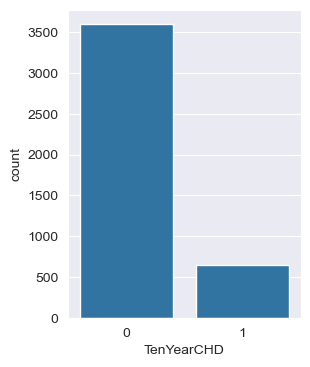

In [289]:
plt.figure(figsize=(3,4))
sns.countplot(data=df,x=df["TenYearCHD"])
plt.show()

The target column in the dataset shows imbalanced data. This means that the number of people without heart disease is significantly larger than those with heart disease.

---
This means that the distribution of values in the target column is not uniform, which could impact the performance of certain machine learning models.

In [290]:
df.describe().T

count        mean        std     min     25%    50%     75%  \
age              4240.0   49.580189   8.572942   32.00   42.00   49.0   56.00   
cigsPerDay       4211.0    9.005937  11.922462    0.00    0.00    0.0   20.00   
BPMeds           4187.0    0.029615   0.169544    0.00    0.00    0.0    0.00   
prevalentStroke  4240.0    0.005896   0.076569    0.00    0.00    0.0    0.00   
prevalentHyp     4240.0    0.310613   0.462799    0.00    0.00    0.0    1.00   
totChol          4190.0  236.699523  44.591284  107.00  206.00  234.0  263.00   
sysBP            4240.0  132.354599  22.033300   83.50  117.00  128.0  144.00   
diaBP            4240.0   82.897759  11.910394   48.00   75.00   82.0   90.00   
BMI              4221.0   25.800801   4.079840   15.54   23.07   25.4   28.04   
heartRate        4239.0   75.878981  12.025348   44.00   68.00   75.0   83.00   
glucose          3852.0   81.963655  23.954335   40.00   71.00   78.0   87.00   
TenYearCHD       4240.0    0.151887   0.358953    0.00    0.00    0.0    0.00   

                   max  
age               70.0  
cigsPerDay        70.0  
BPMeds             1.0  
prevalentStroke    1.0  
prevalentHyp       1.0  
totChol          696.0  
sysBP            295.0  
diaBP            142.5  
BMI               56.8  
heartRate        143.0  
glucose          394.0  
TenYearCHD         1.0

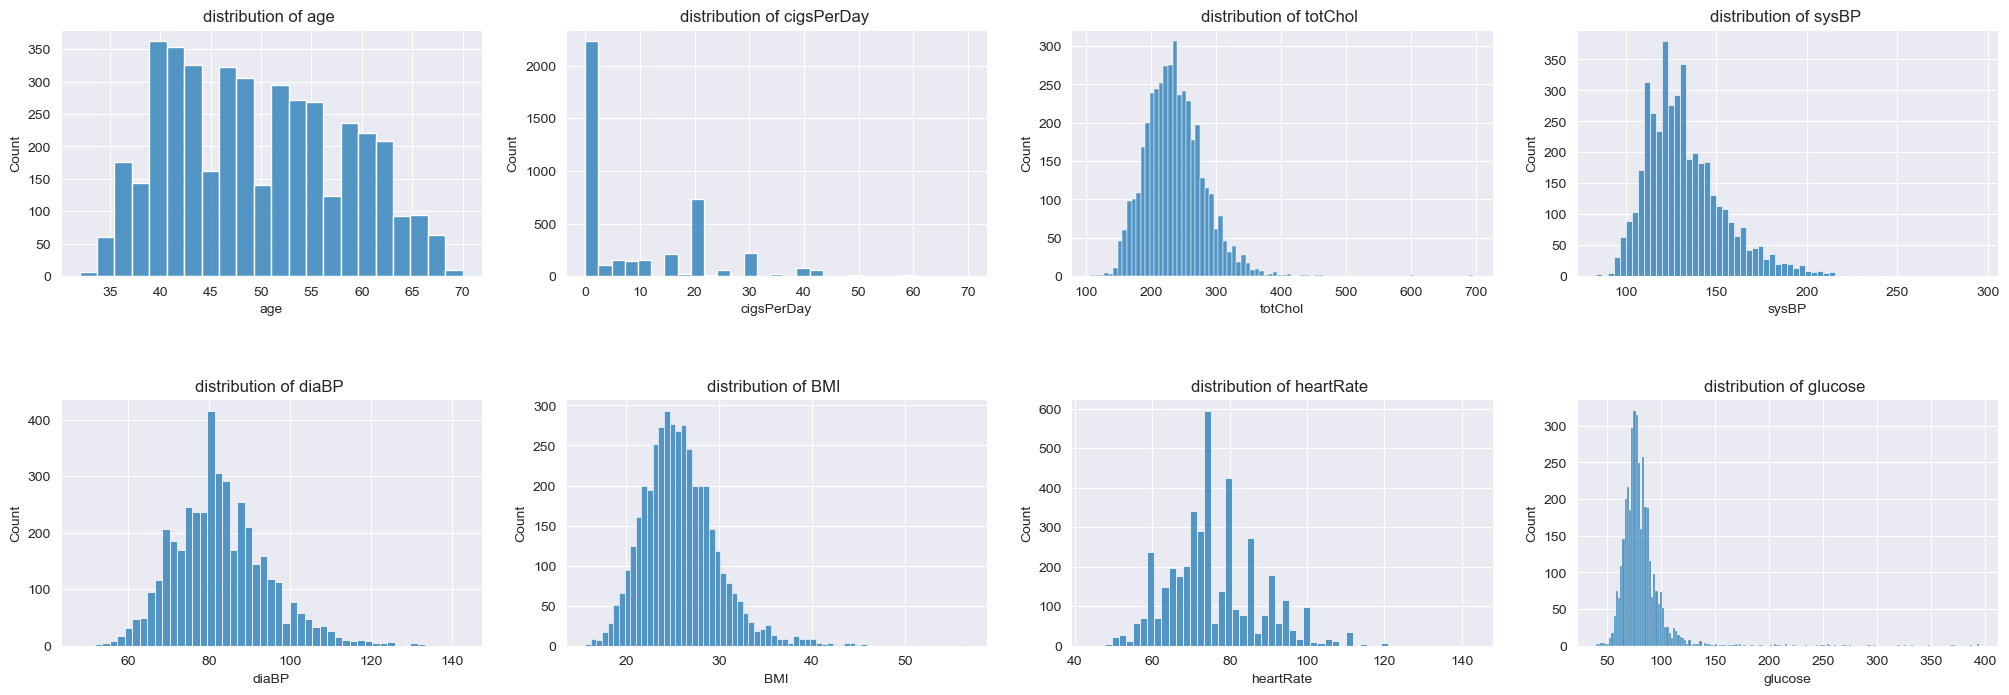

In [291]:
plt.figure(figsize=(25,8))
for i,col in enumerate(con_clos):
    plt.subplot(2,4,i+1)
    sns.histplot(data=df,x=col)
    plt.title(f"distribution of {col} ")
    plt.subplots_adjust(wspace=.2,hspace=.5)

plt.show()

The following plot represents the distribution of values in the continuous columns of the dataset.

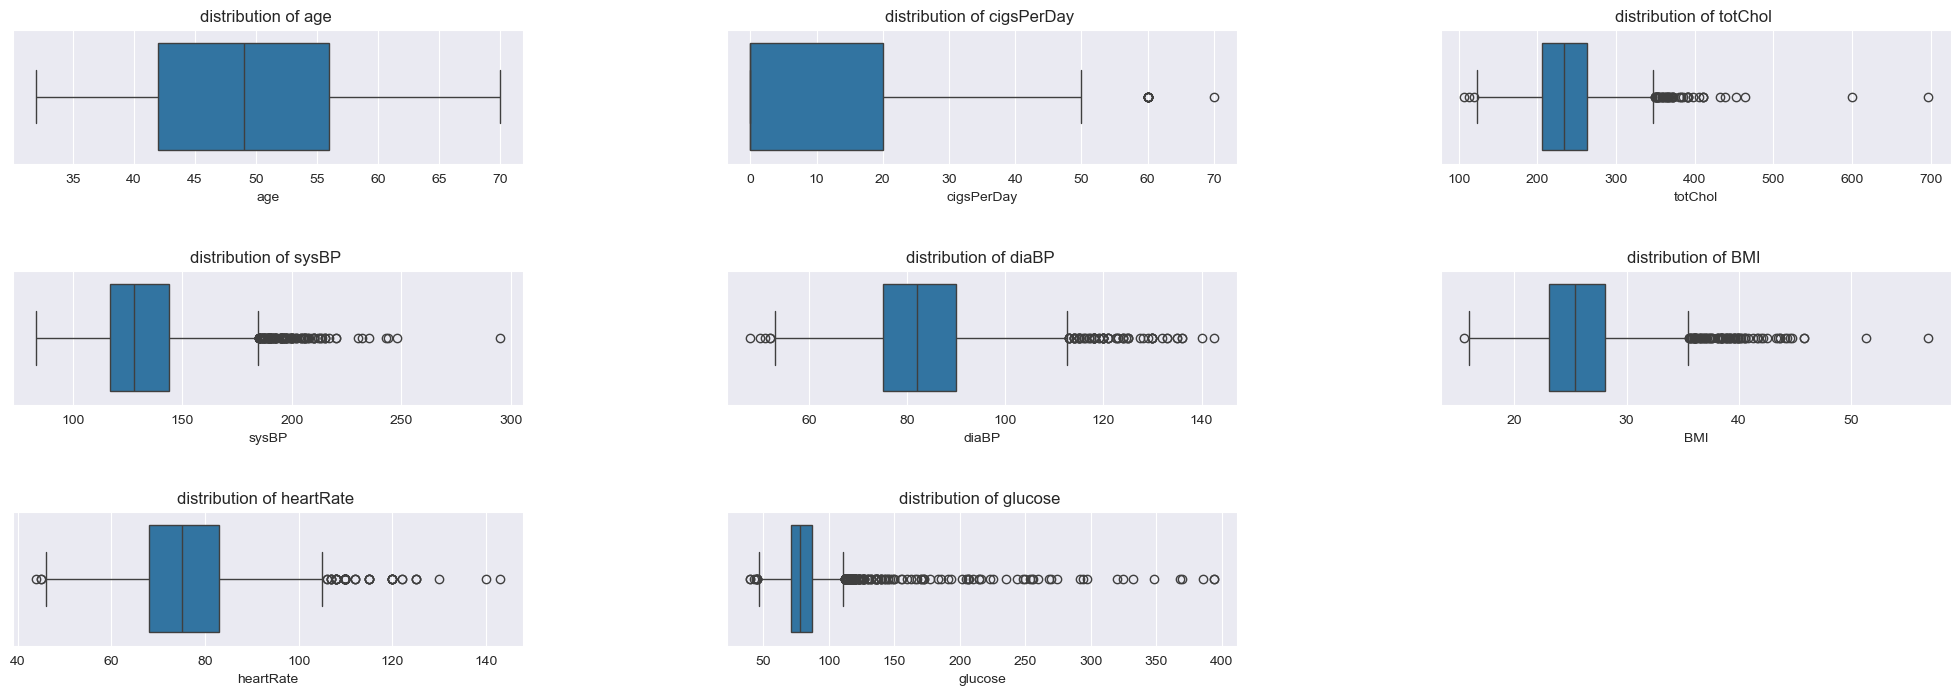

In [292]:
plt.figure(figsize=(25,8))
for i,col in enumerate(con_clos):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df,x=col)
    plt.title(f"distribution of {col} ")
    plt.subplots_adjust(wspace=.4,hspace=.8)

plt.show()

This section shows the outliers in the continuous columns.
After examining the data, we detected that there are no values that can be identified as outliers.
---
### Data Distribution Summary

- **Age**: It follows a normal distribution, indicating symmetrical variation among the age intervals.

- **Total Cholesterol (totChol)**, **Systolic Blood Pressure (sysBP)**, **Diastolic Blood Pressure (diaBP)**, and **BMI (Body Mass Index)**:  
  These variables follow a normal distribution, showing symmetrical differences.

- **Heart Rate** and **Glucose Levels**:  
  These variables follow a normal distribution.

- **Cigarettes Per Day (CigsPerDay)**:  
  This variable is positively skewed.



In [293]:
df.head()

Sex  age  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp diabetes  \
0    male   39         0.0     0.0                0             0       No   
1  female   46         0.0     0.0                0             0       No   
2    male   48        20.0     0.0                0             0       No   
3  female   61        30.0     0.0                0             1       No   
4  female   46        23.0     0.0                0             0       No   

   totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0    195.0  106.0   70.0  26.97       80.0     77.0           0  
1    250.0  121.0   81.0  28.73       95.0     76.0           0  
2    245.0  127.5   80.0  25.34       75.0     70.0           0  
3    225.0  150.0   95.0  28.58       65.0    103.0           1  
4    285.0  130.0   84.0  23.10       85.0     85.0           0

TenYearCHD  BPMeds
0           0.0       3471
            1.0         83
1           0.0        592
            1.0         41
Name: count, dtype: int64
TenYearCHD  prevalentStroke
0           0                  3582
            1                    14
1           0                   633
            1                    11
Name: count, dtype: int64
TenYearCHD  prevalentHyp
0           0               2604
            1                992
1           1                325
            0                319
Name: count, dtype: int64


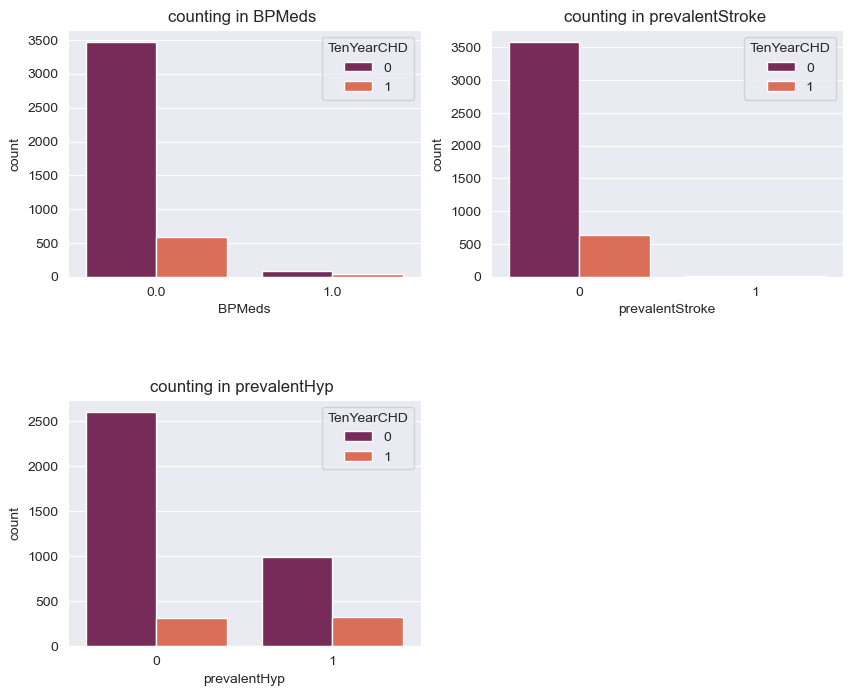

In [294]:
plt.figure(figsize=(10,8))
for i,col in enumerate(nom_numCols):
    plt.subplot(2,2,i+1)
    sns.countplot(data=df,x=col,hue="TenYearCHD",palette="rocket")
    plt.title(f"counting in {col} ")
    plt.subplots_adjust(wspace=.2,hspace=.5)
    print(df.groupby(["TenYearCHD"])[col].value_counts())

plt.show()

- The number of individuals at risk of heart disease is significantly smaller compared to those not at risk.

- **Blood Pressure Medication [BPMeds]**:  
  People taking blood pressure medications are more likely to develop heart disease compared to those who do not.

- **Stroke [PrevalentStroke]**:  
  Individuals who have suffered a stroke are also more likely to develop heart disease, though they represent a very small minority.

- **High Blood Pressure[PrevalentHyp]**:  
  A clear relationship is evident among those who suffer from high blood pressure and their likelihood of developing heart disease.

TenYearCHD  Sex   
0           female    2119
            male      1477
1           male       343
            female     301
Name: count, dtype: int64
TenYearCHD  diabetes
0           No          3527
            Yes           69
1           No           604
            Yes           40
Name: count, dtype: int64


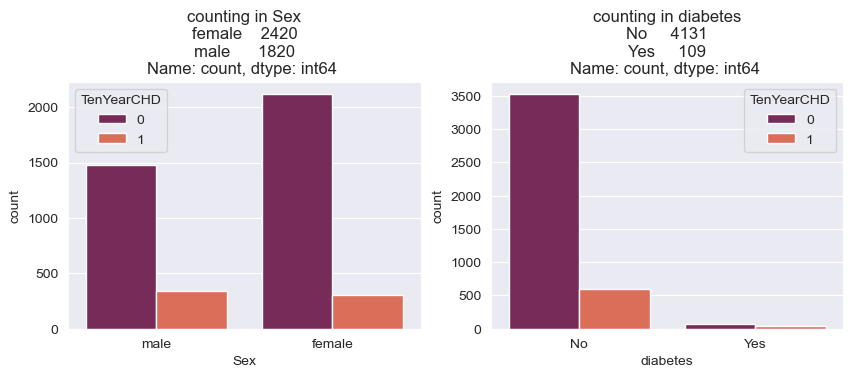

In [295]:
plt.figure(figsize=(10,8))
for i,col in enumerate(cat_cols):
    plt.subplot(2,2,i+1)
    sns.countplot(data=df,x=col,hue="TenYearCHD",palette="rocket")
    plt.title(f"counting in {df[col].value_counts()} ")
    plt.subplots_adjust(wspace=.2,hspace=.5)
    print(df.groupby(["TenYearCHD"])[col].value_counts())

plt.show()

- The number of **male** is smaller than the number of **female**, but male are more likely to develop heart disease compared to femal.

- A **significant percentage of individuals with diabetes** are at a high risk of developing heart disease.

<Figure size 1000x800 with 0 Axes>

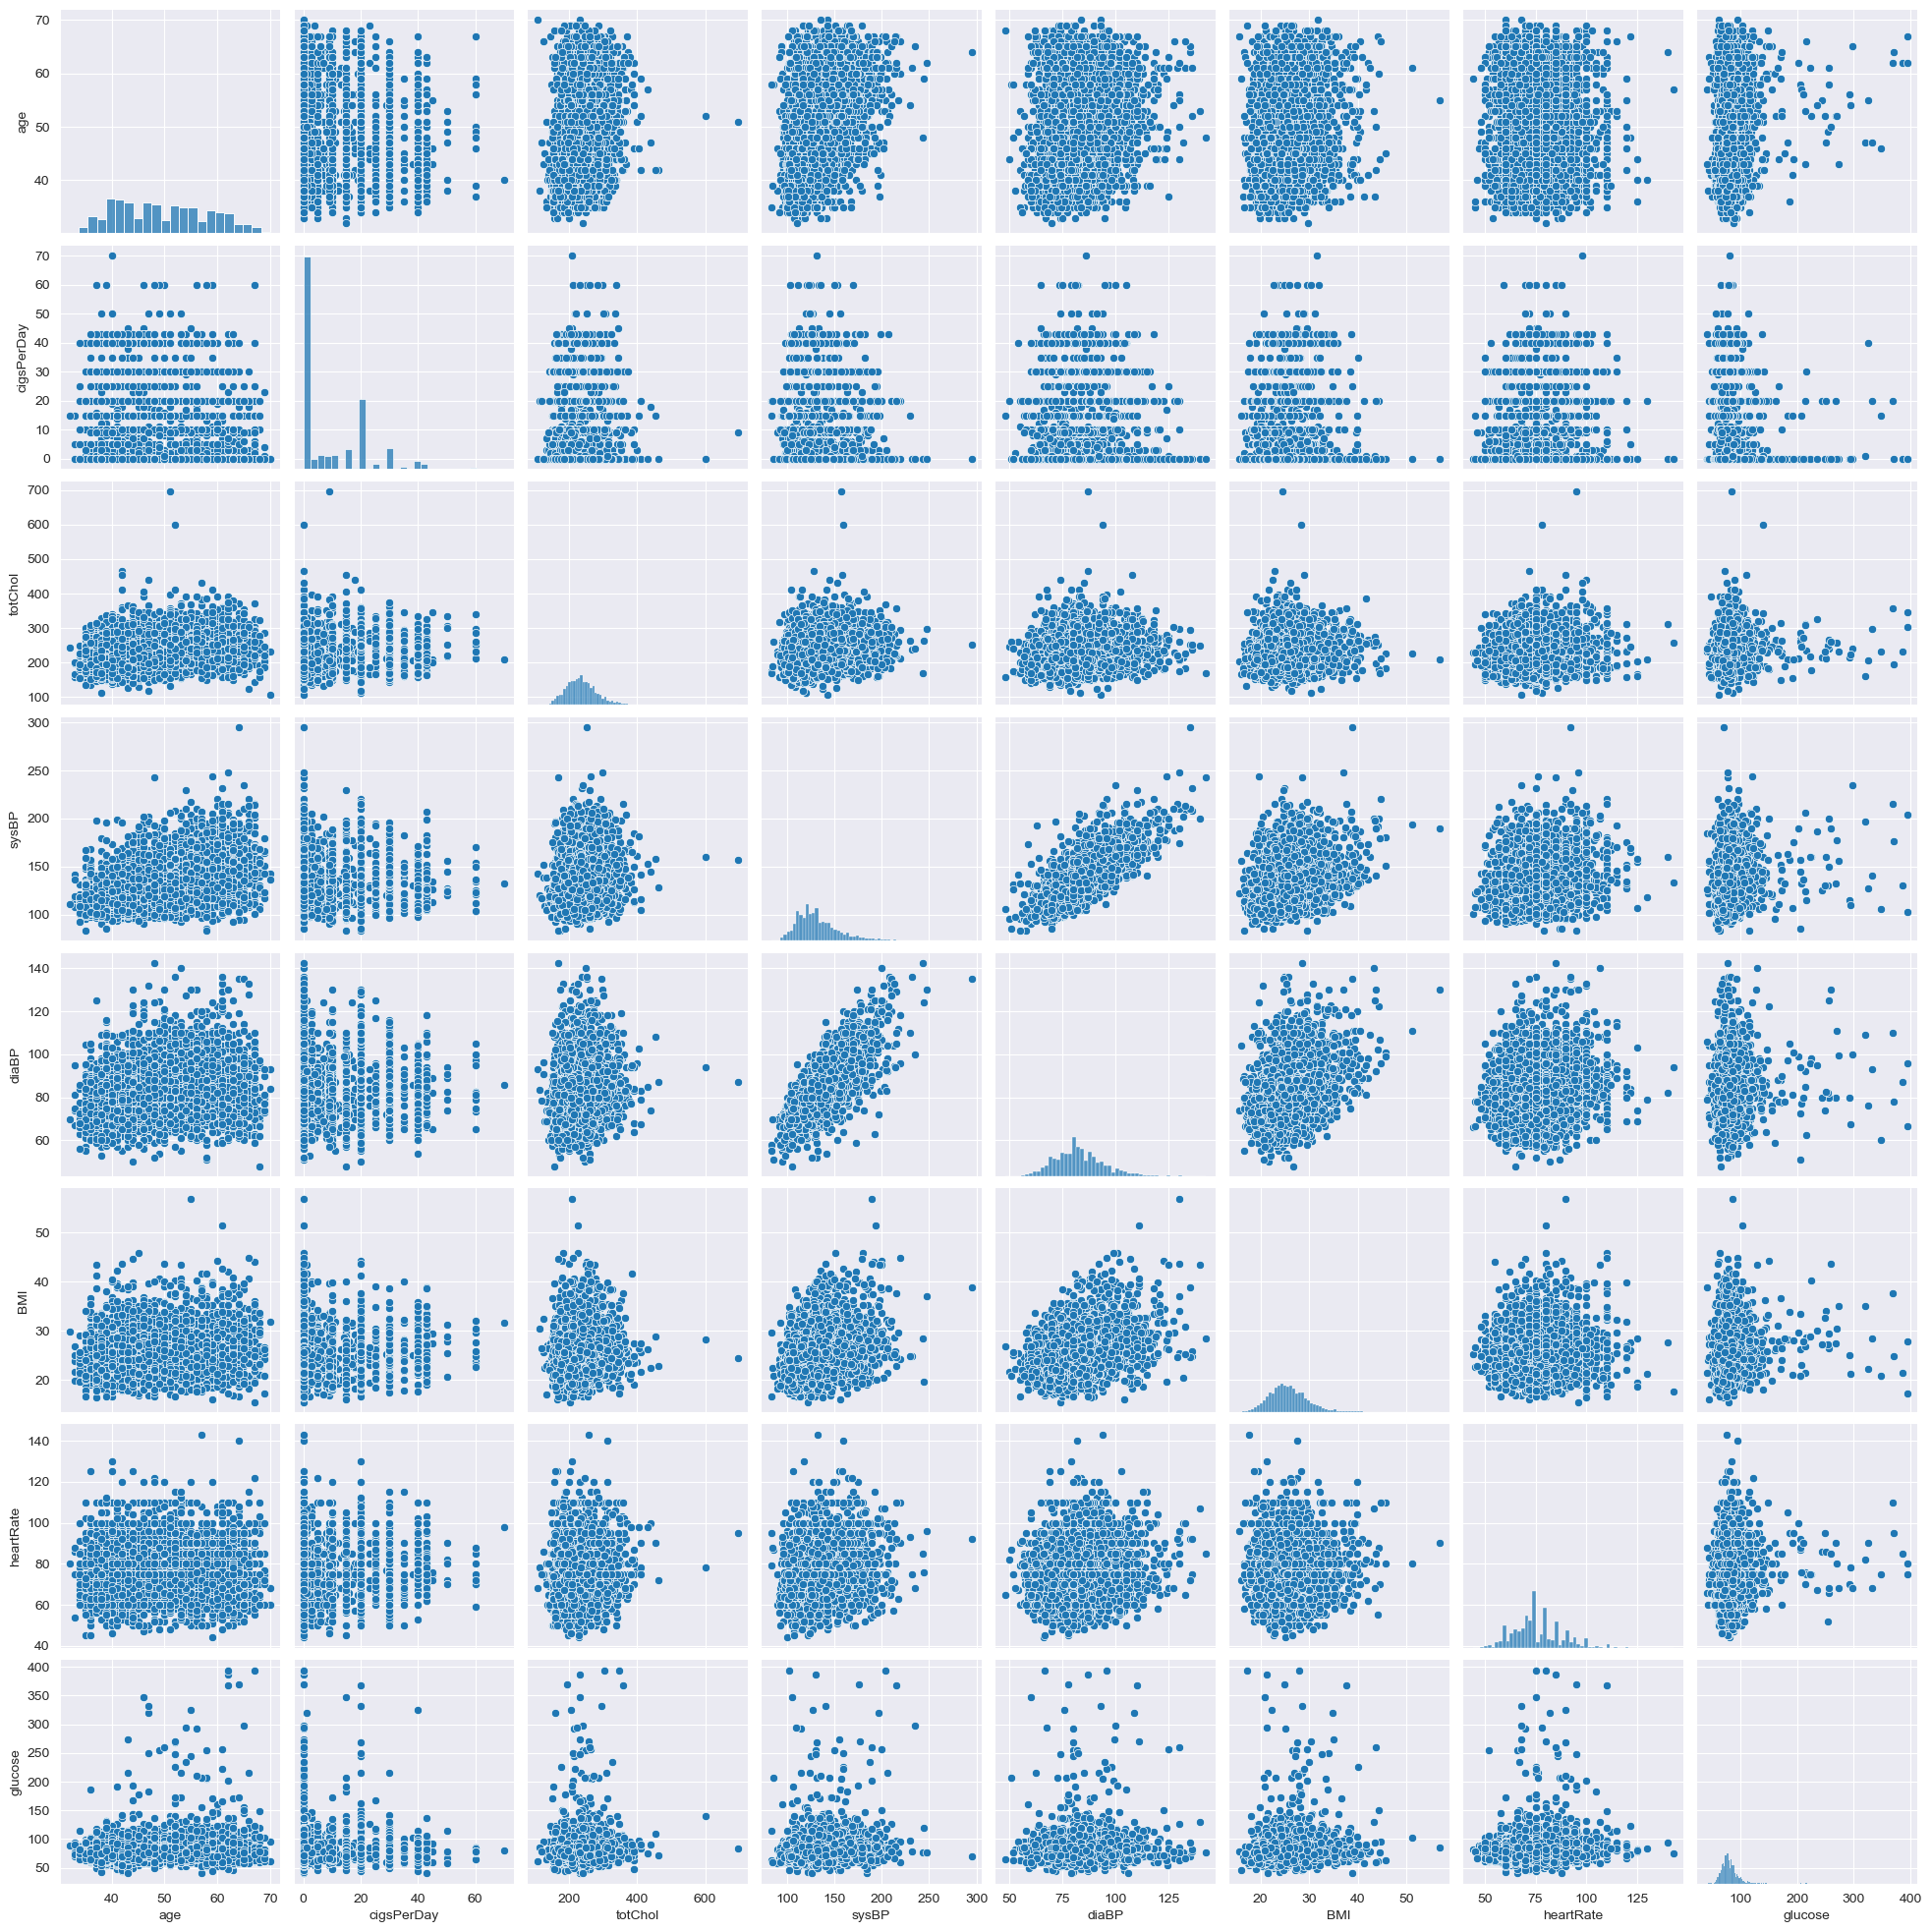

In [296]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df[con_clos])

plt.show()

plotting To analyze the correlation between continuous variables, we examine how these variables relate to each other to identify patterns or associations.







TenYearCHD
0    48.762514
1    54.145963
Name: age, dtype: float64
TenYearCHD
0     8.713925
1    10.629283
Name: cigsPerDay, dtype: float64
TenYearCHD
0    235.147398
1    245.388976
Name: totChol, dtype: float64
TenYearCHD
0    130.337319
1    143.618789
Name: sysBP, dtype: float64
TenYearCHD
0    82.166435
1    86.981366
Name: diaBP, dtype: float64
TenYearCHD
0    25.671659
1    26.531451
Name: BMI, dtype: float64
TenYearCHD
0    75.762514
1    76.530327
Name: heartRate, dtype: float64
TenYearCHD
0    80.679251
1    89.008418
Name: glucose, dtype: float64


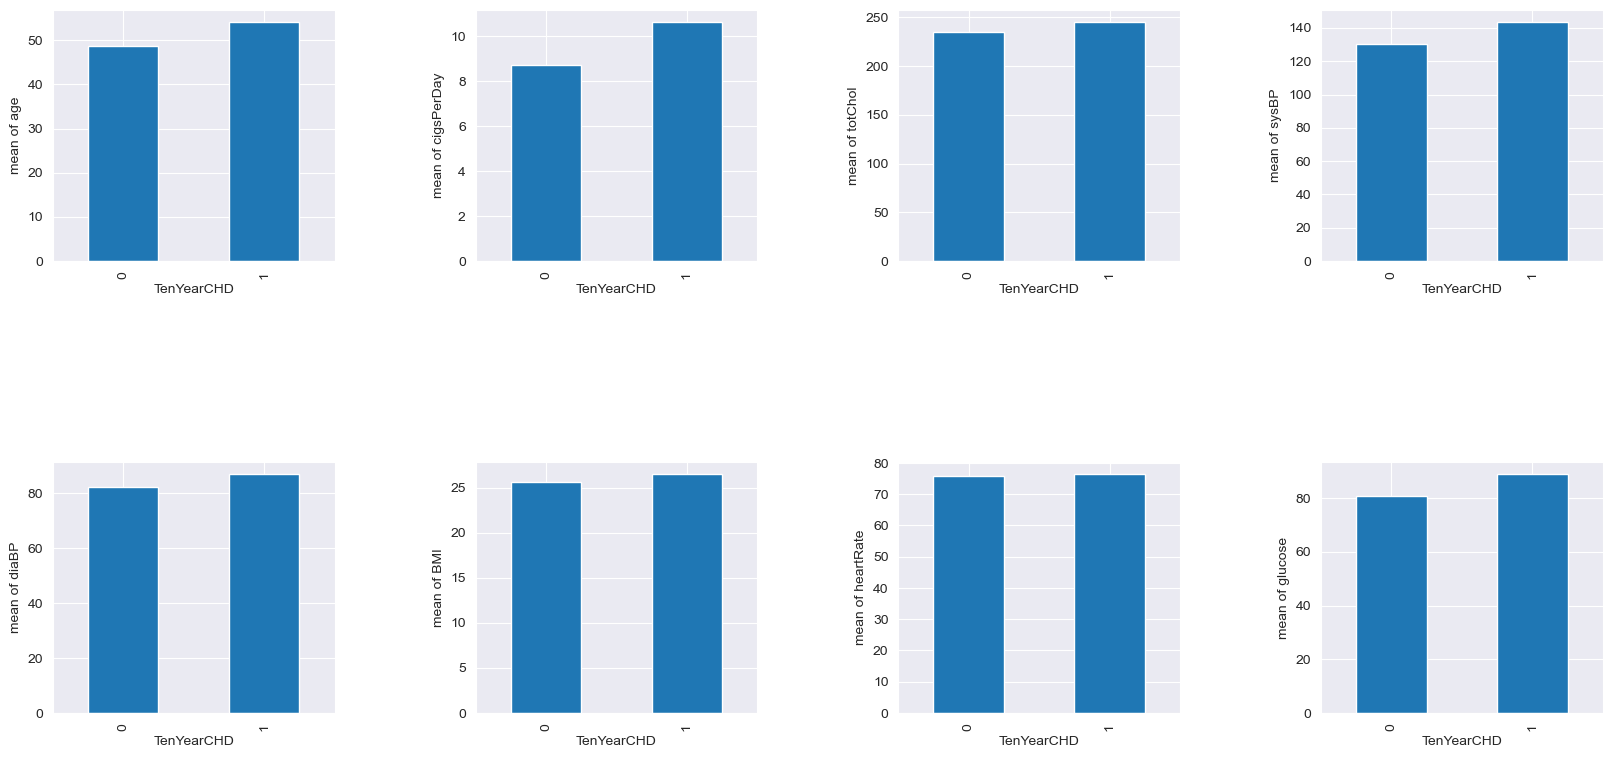

In [297]:
plt.figure(figsize=(20,15))
for i,col in enumerate(con_clos):
    plt.subplot(3,4,i+1)
    df.groupby("TenYearCHD")[col].mean().plot(kind="bar")
    plt.ylabel(f"mean of {col }")  
    print(df.groupby("TenYearCHD")[col].mean())
    plt.subplots_adjust(hspace=.8,wspace=.5)
plt.show()

### Plot Description: Average of Continuous Columns by Target Values

This plot illustrates the average values of all continuous columns, grouped by the two categories in the target column. It provides insights into how the continuous variables differ based on the target classification.

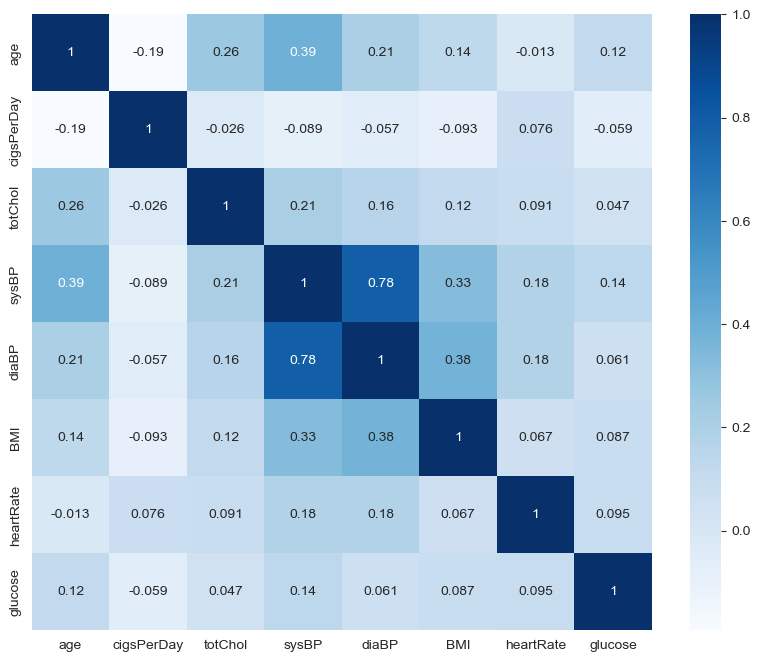

In [298]:
corr_matrix = df[con_clos].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.show()

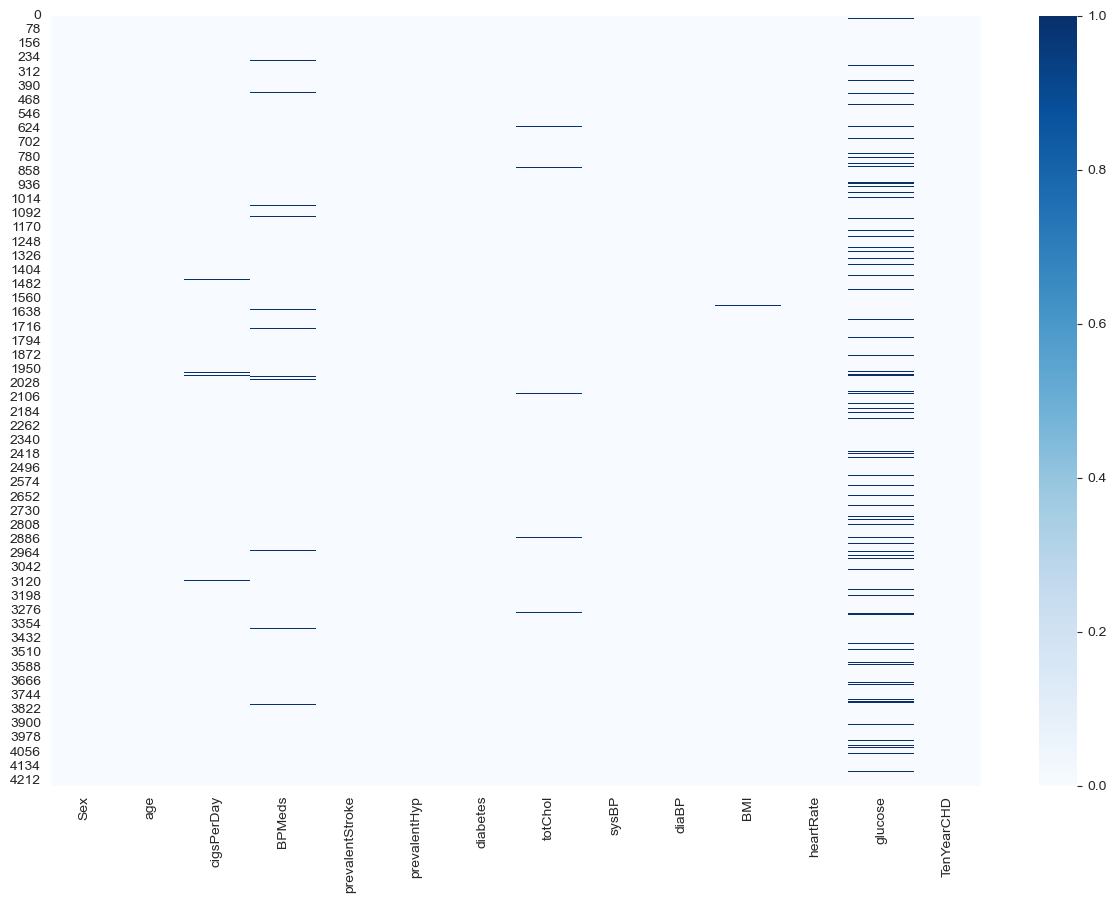

In [299]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cmap="Blues")
plt.show()

### Distribution of Nulls in the Dataset

This section shows the distribution of null values in our dataset.

In [300]:
df[nom_numCols]=df[nom_numCols].astype("category")
df[cat_cols]=df[cat_cols].astype("category")

We convert the data type of selected features to `category` for better data handling and analysis.

In [301]:
information(df)

                  d_types  n_uniques  n_nuls
Sex              category          2       0
age                 int64         39       0
cigsPerDay        float64         33      29
BPMeds           category          2      53
prevalentStroke  category          2       0
prevalentHyp     category          2       0
diabetes         category          2       0
totChol           float64        248      50
sysBP             float64        234       0
diaBP             float64        146       0
BMI               float64       1364      19
heartRate         float64         73       1
glucose           float64        143     388
TenYearCHD          int64          2       0
data have  0 numbers of duplications 
this data have 4240 records and 14  features


# Data cleaning 

filling nulls values on every column  

In [302]:
df["cigsPerDay"]=df["cigsPerDay"].fillna(df["cigsPerDay"].median())
df["BPMeds"]=df["BPMeds"].fillna(method="ffill")
df["totChol"]=df["totChol"].fillna(df["totChol"].median())
df["BMI"]=df["BMI"].fillna(df["BMI"].median())
df.dropna(subset="heartRate",inplace=True)
df["glucose"]=df["glucose"].fillna(df["glucose"].median())

In [303]:
information(df)

                  d_types  n_uniques  n_nuls
Sex              category          2       0
age                 int64         39       0
cigsPerDay        float64         33       0
BPMeds           category          2       0
prevalentStroke  category          2       0
prevalentHyp     category          2       0
diabetes         category          2       0
totChol           float64        248       0
sysBP             float64        234       0
diaBP             float64        146       0
BMI               float64       1364       0
heartRate         float64         73       0
glucose           float64        143       0
TenYearCHD          int64          2       0
data have  0 numbers of duplications 
this data have 4239 records and 14  features


# now data is cleaned let's do preprocessing

In [304]:
X=df.drop("TenYearCHD",axis=1)
Y=df["TenYearCHD"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.25,random_state=42)


### Splitting the Data into Training and Testing Sets

In [305]:
encoders={}
for col in cat_cols:
    encoder = LabelEncoder()
    encoder.fit(x_train[col])
    x_train[col]=encoder.transform(x_train[col])
    x_test[col]=encoder.transform(x_test[col])
    encoders[col]=encoder

### Encoding Object Columns to Numeric Values Using Label Encoder
We store each encoder in a dictionary to facilitate reuse during deployment.


In [306]:
x_train1=x_train.copy()
x_test1=x_test.copy()

We create a copy of the dataset to perform scaling on the copy. This results in two versions of the data:
- One version is [x_train , x_test] **not scaled**.
- The other version remains [x_train1 , x_test1] **scaled**.

In [307]:
scaller=StandardScaler()
x_train1[con_clos]=scaller.fit_transform(x_train1[con_clos])
x_test1[con_clos]=scaller.transform(x_test1[con_clos])
x_train1[nom_numCols]=x_train1[nom_numCols].astype("int")
x_test1[nom_numCols]=x_test1[nom_numCols].astype("int")


In [308]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(x_train1, y_train)

# Apply Tomek Links
tomek = TomekLinks()
X_tomek, y_tomek = tomek.fit_resample(x_train1, y_train)

# Apply SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(x_train1, y_train)

# Print results
print(f"Original dataset size: {x_train.shape}, Class distribution: {pd.Series(y_train).value_counts().to_dict()}")
print(f"After SMOTE: {X_smote.shape}, Class distribution: {pd.Series(y_smote).value_counts().to_dict()}")
print(f"After Tomek Links: {X_tomek.shape}, Class distribution: {pd.Series(y_tomek).value_counts().to_dict()}")
print(f"After SMOTE-Tomek: {X_smote_tomek.shape}, Class distribution: {pd.Series(y_smote_tomek).value_counts().to_dict()}")

Original dataset size: (3179, 13), Class distribution: {0: 2708, 1: 471}
After SMOTE: (5416, 13), Class distribution: {1: 2708, 0: 2708}
After Tomek Links: (3049, 13), Class distribution: {0: 2578, 1: 471}
After SMOTE-Tomek: (5390, 13), Class distribution: {1: 2695, 0: 2695}


In this section, we apply different sampling techniques to address the class imbalance in the target column. We will use **SMOTE**, **Tomek Links**, and **SMOTE-Tomek** to generate new balanced datasets.


In [309]:
X_smote["BPMeds"]=X_smote["BPMeds"].fillna(method="ffill")
X_smote["prevalentStroke"]=X_smote["prevalentStroke"].fillna(0)
X_smote["prevalentHyp"]=X_smote["prevalentHyp"].fillna(method="ffill")

In [310]:
X_smote.isnull().sum()

Sex                0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

In [311]:
X_smote_tomek["BPMeds"]=X_smote_tomek["BPMeds"].fillna(method="ffill")
X_smote_tomek["prevalentStroke"]=X_smote_tomek["prevalentStroke"].fillna(0)
X_smote_tomek["prevalentHyp"]=X_smote_tomek["prevalentHyp"].fillna(method="ffill")

In [312]:
X_smote_tomek.isnull().sum()

Sex                0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

After applying the sampling techniques (SMOTE, Tomek Links, and SMOTE-Tomek) to balance the dataset, it is crucial to clean the newly generated datasets by handling any missing values or outliers in the same way as we did with the original data. This ensures that the preprocessing steps are consistent and that the models are trained on data that is well-prepared for analysis.


### now finished preprocessing let's apply and evaluate some classification models 

## first what should i know about my Evaluation Metrics 
1. **Accuracy**:  
   - Measures the overall correctness of the model by calculating the proportion of correctly predicted instances (both positive and negative) out of the total predictions.  
   - Formula:  
     \[
     \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Instances}}
     \]

2. **Precision**:  
   - Focuses on the quality of positive predictions, indicating how many of the predicted positive instances are actually positive.  
   - Useful when minimizing false positives is important.  
   - Formula:  
     \[
     \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
     \]

3. **Recall (Sensitivity or True Positive Rate)**:  
   - Measures the ability of the model to identify all actual positive instances.  
   - Useful when minimizing false negatives is crucial.  
   - Formula:  
     \[
     \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
     \]

4. **ROC Curve (Receiver Operating Characteristic)**:  
   - A graphical representation of the model’s performance by plotting the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at different classification thresholds.  
   - **TPR** (Recall) represents the proportion of actual positives correctly identified.  
   - **FPR** represents the proportion of actual negatives incorrectly classified as positive.  
   - The area under the ROC curve (**AUC**) is used to measure the model's overall ability to distinguish between classes

### Summary:  
- **Accuracy** provides an overall performance measure but can be misleading for imbalanced datasets.  
- **Precision** is critical when false positives are costly.  
- **Recall** is vital when missing true positives has severe consequences.
- **ROC Curve** A model that performs well will have an ROC curve that is closer to the top-left corner, indicating high sensitivity and low false positive rates.
  


In the context of predicting heart disease, it is crucial to prioritize the following:  
- **Maximizing True Positives (Recall)**:  
  Identifying individuals who truly have heart disease is critical for early intervention and treatment. Missing these cases (false negatives) could lead to severe consequences.

- **Minimizing False Negatives**:  
  A false negative occurs when the model predicts that a person does not have heart disease when, in fact, they do. Reducing false negatives is essential to ensure no high-risk individual is overlooked.

### Why Recall Matters:  
Given the life-threatening nature of heart disease, **Recall** (True Positive Rate) is the most important metric. It ensures that the model is effective in identifying as many individuals with heart disease as possible, even if it means tolerating some false positives (which can be verified through additional tests).

In [313]:
param_grid = {
    'class_weight': ["balanced",None],"penalty":["l1","l2"],"tol":[.000001,.00001,.0001],"max_iter":[1000,100,1500]}
log_r=LogisticRegression(random_state=42)
# Perform grid search
grid = GridSearchCV(log_r, param_grid, cv=5)
grid.fit(x_train1, y_train)

# Best parameters
print("Best parameters:", grid.best_params_)

Best parameters: {'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'tol': 1e-06}


### Finding the Best Hyperparameters for Logistic Regression Using GridSearch


Accuracy for train is : 0.8566743194489996 %   Accuracy for test is : 0.8386792452830188 % 
recall for train is : 0.11464968152866242 %   recall for test is : 0.05813953488372093 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2578
           1       0.73      0.11      0.20       471

    accuracy                           0.86      3049
   macro avg       0.79      0.55      0.56      3049
weighted avg       0.84      0.86      0.81      3049


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       888
           1       0.53      0.06      0.10       172

    accuracy                           0.84      1060
   macro avg       0.69      0.52      0.51      1060
weighted avg       0.79      0.84      0.78      1060


Confusion Matrix for train :
[[2558   20]
 [ 417   54]]

Confusion Matrix for test :
[[879   9

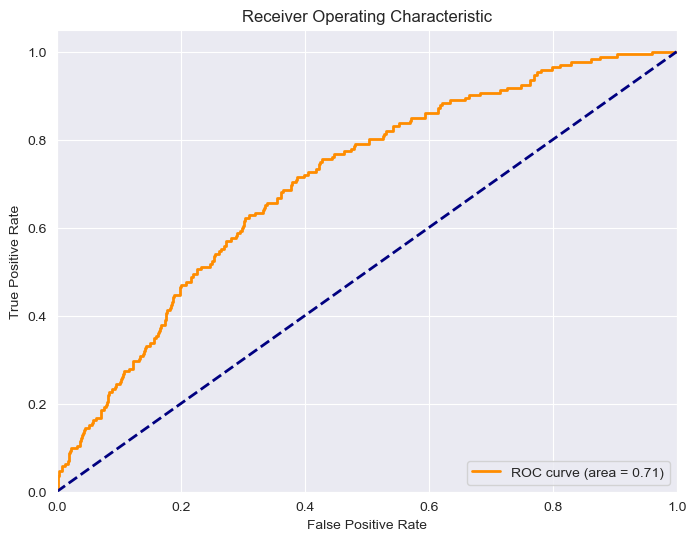

In [314]:
log_r1=LogisticRegression(random_state=42,max_iter=1000,penalty="l2",tol=.000001)
train_classifier(log_r1,X_tomek,y_tomek,x_test1,y_test)

Accuracy for train is : 0.6752215657311669 %   Accuracy for test is : 0.6509433962264151 % 
recall for train is : 0.6787296898079763 %   recall for test is : 0.5930232558139535 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.68      0.67      0.67      2708
           1       0.67      0.68      0.68      2708

    accuracy                           0.68      5416
   macro avg       0.68      0.68      0.68      5416
weighted avg       0.68      0.68      0.68      5416


Classification Report for test :
              precision    recall  f1-score   support

           0       0.89      0.66      0.76       888
           1       0.25      0.59      0.36       172

    accuracy                           0.65      1060
   macro avg       0.57      0.63      0.56      1060
weighted avg       0.79      0.65      0.69      1060


Confusion Matrix for train :
[[1819  889]
 [ 870 1838]]

Confusion Matrix for test :
[[588 300]


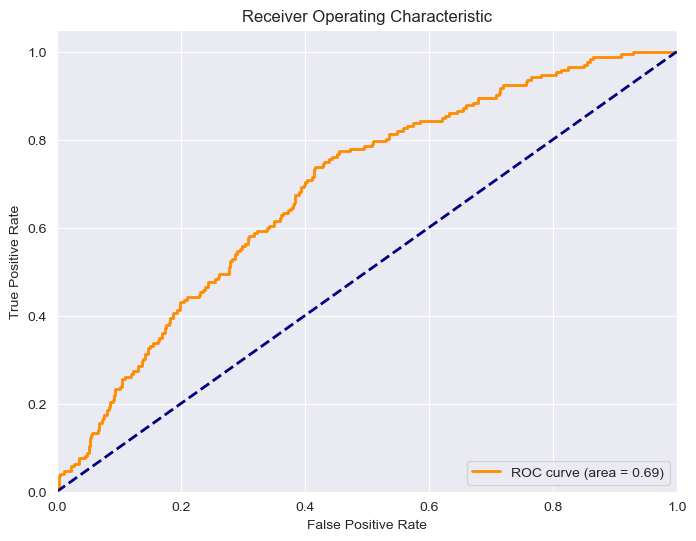

In [315]:
log_r2=LogisticRegression(random_state=42,max_iter=1000,penalty="l2",tol=.000001)
train_classifier(log_r2,X_smote,y_smote,x_test1,y_test)

Accuracy for train is : 0.6760667903525046 %   Accuracy for test is : 0.6518867924528302 % 
recall for train is : 0.6805194805194805 %   recall for test is : 0.5930232558139535 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.68      0.67      0.67      2695
           1       0.67      0.68      0.68      2695

    accuracy                           0.68      5390
   macro avg       0.68      0.68      0.68      5390
weighted avg       0.68      0.68      0.68      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.89      0.66      0.76       888
           1       0.25      0.59      0.36       172

    accuracy                           0.65      1060
   macro avg       0.57      0.63      0.56      1060
weighted avg       0.79      0.65      0.70      1060


Confusion Matrix for train :
[[1810  885]
 [ 861 1834]]

Confusion Matrix for test :
[[589 299]


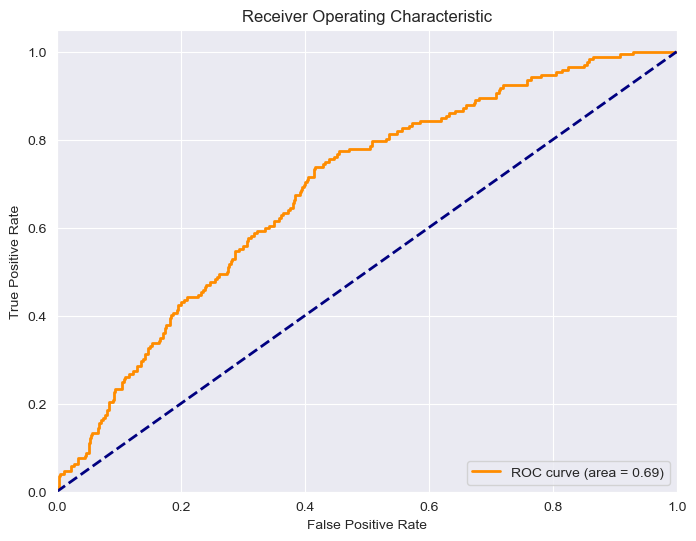

In [316]:
choose_log_r=LogisticRegression(random_state=42,max_iter=100)
train_classifier(choose_log_r,X_smote_tomek,y_smote_tomek,x_test1,y_test)

Accuracy for train is : 0.8600188738597043 %   Accuracy for test is : 0.8415094339622642 % 
recall for train is : 0.08492569002123142 %   recall for test is : 0.046511627906976744 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2708
           1       0.74      0.08      0.15       471

    accuracy                           0.86      3179
   macro avg       0.80      0.54      0.54      3179
weighted avg       0.84      0.86      0.81      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.67      0.05      0.09       172

    accuracy                           0.84      1060
   macro avg       0.76      0.52      0.50      1060
weighted avg       0.81      0.84      0.78      1060


Confusion Matrix for train :
[[2694   14]
 [ 431   40]]

Confusion Matrix for test :
[[884   

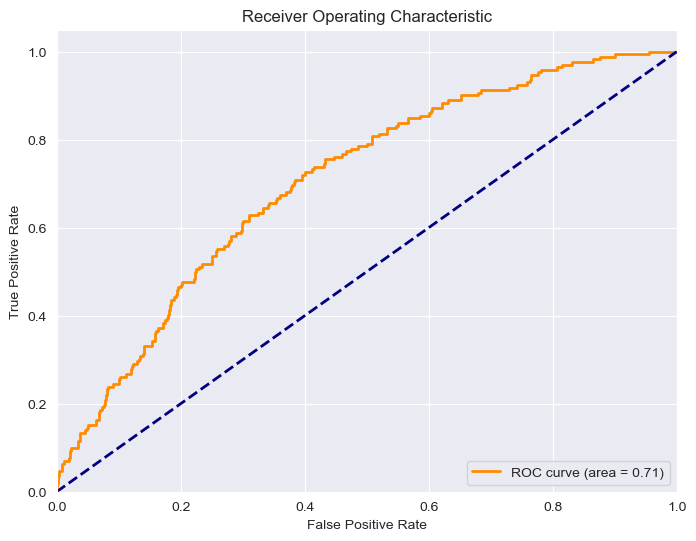

In [317]:
log_r=LogisticRegression(random_state=42,max_iter=1000,penalty="l2",tol=.000001)
train_classifier(log_r,x_train1,y_train,x_test1,y_test)

After applying **Logistic Regression** to the original data and resampled data the accuracy results of the best **(smote_tomek)** are as follows:
- **Training Accuracy**: 67.8%
- **Testing Accuracy**: 65.3%
- **Training recall**: 67.9%
- **Testing recall**: 61.6%
---

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.001],
    'kernel': ['rbf', 'linear']
}
svc=SVC()

grid = GridSearchCV(svc, param_grid, scoring="recall",cv=4)
grid.fit(X_smote_tomek, y_smote_tomek)

print("Best parameters:", grid.best_params_)


---
### Finding the Best Hyperparameters for SVC Using GridSearch but this will take so much time 
if you want to apply gridsearch on SVC change the upper cell from markdown to code type and run it . 


Accuracy for train is : 0.8455231223351919 %   Accuracy for test is : 0.8377358490566038 % 
recall for train is : 0.0 %   recall for test is : 0.0 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2578
           1       0.00      0.00      0.00       471

    accuracy                           0.85      3049
   macro avg       0.42      0.50      0.46      3049
weighted avg       0.71      0.85      0.77      3049


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.00      0.00      0.00       172

    accuracy                           0.84      1060
   macro avg       0.42      0.50      0.46      1060
weighted avg       0.70      0.84      0.76      1060


Confusion Matrix for train :
[[2578    0]
 [ 471    0]]

Confusion Matrix for test :
[[888   0]
 [172   0]]


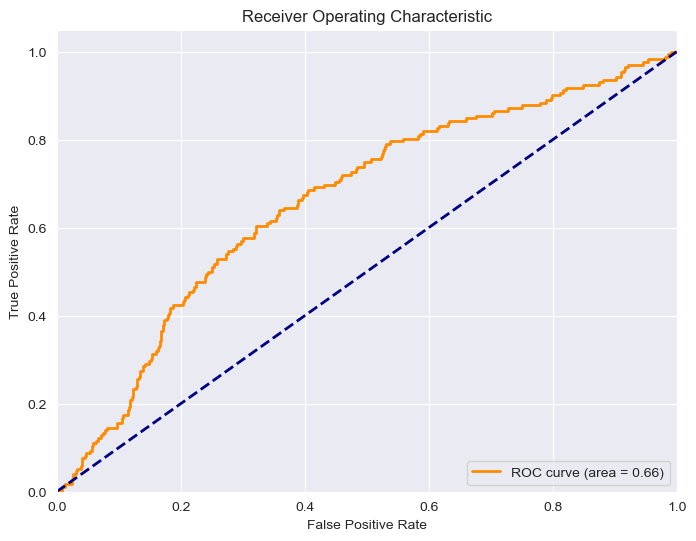

In [318]:
svc1=SVC(C=.06,gamma=1,kernel="rbf",probability=True)
train_classifier(svc1,X_tomek,y_tomek,x_test1,y_test)

Accuracy for train is : 0.7439069423929099 %   Accuracy for test is : 0.530188679245283 % 
recall for train is : 0.9254062038404727 %   recall for test is : 0.8372093023255814 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.88      0.56      0.69      2708
           1       0.68      0.93      0.78      2708

    accuracy                           0.74      5416
   macro avg       0.78      0.74      0.74      5416
weighted avg       0.78      0.74      0.74      5416


Classification Report for test :
              precision    recall  f1-score   support

           0       0.94      0.47      0.63       888
           1       0.23      0.84      0.37       172

    accuracy                           0.53      1060
   macro avg       0.59      0.65      0.50      1060
weighted avg       0.82      0.53      0.58      1060


Confusion Matrix for train :
[[1523 1185]
 [ 202 2506]]

Confusion Matrix for test :
[[418 470]
 

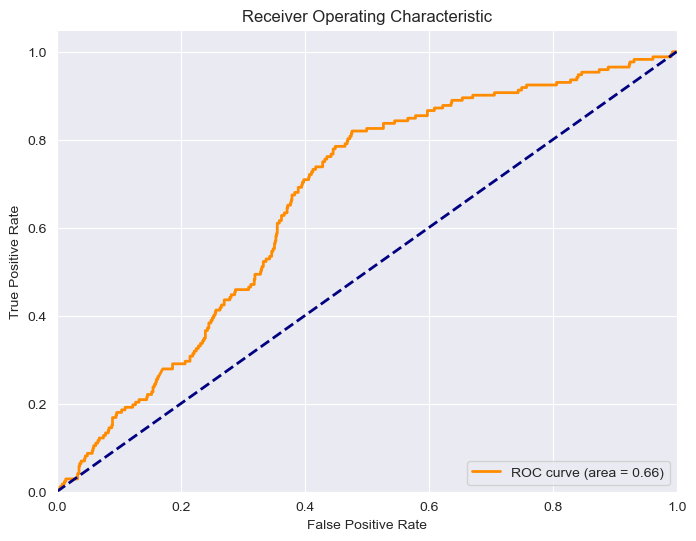

In [319]:
svc2=SVC(C=.06,gamma=1,kernel="rbf",probability=True)
train_classifier(svc2,X_smote,y_smote,x_test1,y_test)

Accuracy for train is : 0.7443413729128014 %   Accuracy for test is : 0.5320754716981132 % 
recall for train is : 0.9280148423005566 %   recall for test is : 0.8372093023255814 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.89      0.56      0.69      2695
           1       0.68      0.93      0.78      2695

    accuracy                           0.74      5390
   macro avg       0.78      0.74      0.74      5390
weighted avg       0.78      0.74      0.74      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.94      0.47      0.63       888
           1       0.24      0.84      0.37       172

    accuracy                           0.53      1060
   macro avg       0.59      0.66      0.50      1060
weighted avg       0.82      0.53      0.59      1060


Confusion Matrix for train :
[[1511 1184]
 [ 194 2501]]

Confusion Matrix for test :
[[420 468]


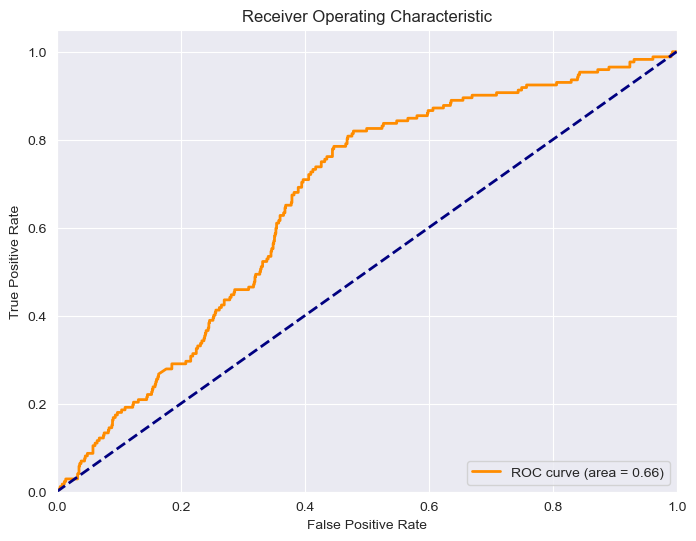

In [320]:
best_svc=SVC(C=.06,gamma=1,kernel="rbf",probability=True)
train_classifier(best_svc,X_smote_tomek,y_smote_tomek,x_test1,y_test)

Accuracy for train is : 0.8518402013211702 %   Accuracy for test is : 0.8377358490566038 % 
recall for train is : 0.0 %   recall for test is : 0.0 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2708
           1       0.00      0.00      0.00       471

    accuracy                           0.85      3179
   macro avg       0.43      0.50      0.46      3179
weighted avg       0.73      0.85      0.78      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.00      0.00      0.00       172

    accuracy                           0.84      1060
   macro avg       0.42      0.50      0.46      1060
weighted avg       0.70      0.84      0.76      1060


Confusion Matrix for train :
[[2708    0]
 [ 471    0]]

Confusion Matrix for test :
[[888   0]
 [172   0]]


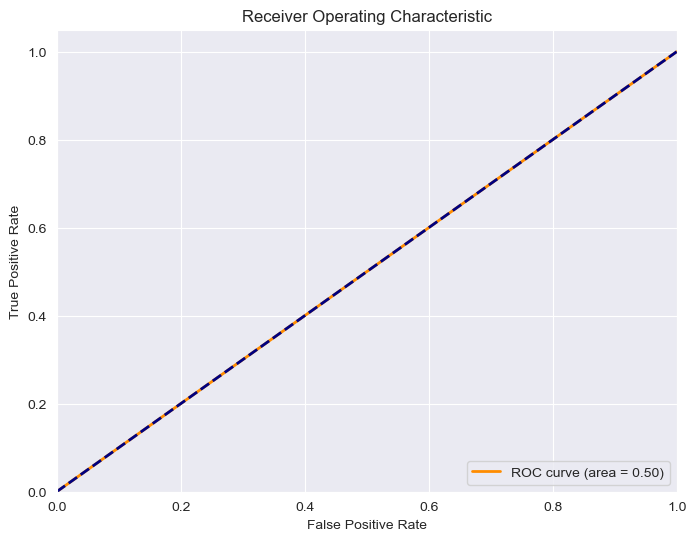

In [321]:
svc=SVC(C=.06,gamma=1,kernel="rbf",probability=True)
train_classifier(svc,x_train1,y_train,x_test,y_test)

After applying **SVC** to the original data and resampled data the accuracy results of the best **(smote_tomek)** are as follows:
- **Training Accuracy**: 74.4%
- **Testing Accuracy**: 53.8%
- **Training recall**: 92.3%
- **Testing recall**: 82.6%
---

rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [1000, 100, 200],
    'max_depth': [10,15, 20],
    'min_samples_split': [4,3,5],
    'min_samples_leaf': [3,4,5],
}
grid = GridSearchCV(rf_model, param_grid, scoring="recall",cv=4)
grid.fit(X_smote_tomek, y_smote_tomek)

print("Best parameters:", grid.best_params_)


---
### Finding the Best Hyperparameters for Random Forest Using GridSearch but this will take so much time. 
if you want to apply gridsearch on RandomForest change the upper cell from markdown to code type and run it . 


Accuracy for train is : 0.855690390291899 %   Accuracy for test is : 0.8386792452830188 % 
recall for train is : 0.06581740976645435 %   recall for test is : 0.011627906976744186 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2578
           1       1.00      0.07      0.12       471

    accuracy                           0.86      3049
   macro avg       0.93      0.53      0.52      3049
weighted avg       0.88      0.86      0.80      3049


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.67      0.01      0.02       172

    accuracy                           0.84      1060
   macro avg       0.75      0.51      0.47      1060
weighted avg       0.81      0.84      0.77      1060


Confusion Matrix for train :
[[2578    0]
 [ 440   31]]

Confusion Matrix for test :
[[887   1

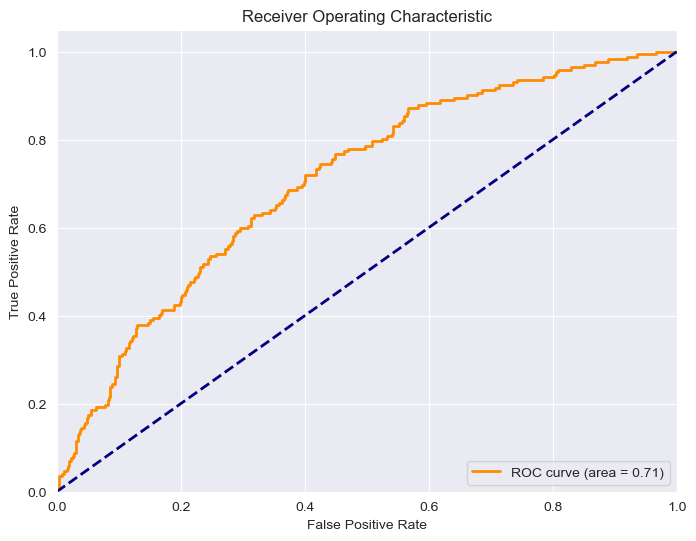

In [322]:
rf_model1=RandomForestClassifier(n_estimators=500,max_depth=5,min_samples_leaf=2,min_samples_split=2)
train_classifier(rf_model1,X_tomek,y_tomek,x_test1,y_test)

Accuracy for train is : 0.7464918759231906 %   Accuracy for test is : 0.6773584905660377 % 
recall for train is : 0.7950516986706057 %   recall for test is : 0.622093023255814 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      2708
           1       0.72      0.80      0.76      2708

    accuracy                           0.75      5416
   macro avg       0.75      0.75      0.75      5416
weighted avg       0.75      0.75      0.75      5416


Classification Report for test :
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       888
           1       0.28      0.62      0.38       172

    accuracy                           0.68      1060
   macro avg       0.59      0.66      0.58      1060
weighted avg       0.80      0.68      0.72      1060


Confusion Matrix for train :
[[1890  818]
 [ 555 2153]]

Confusion Matrix for test :
[[611 277]
 

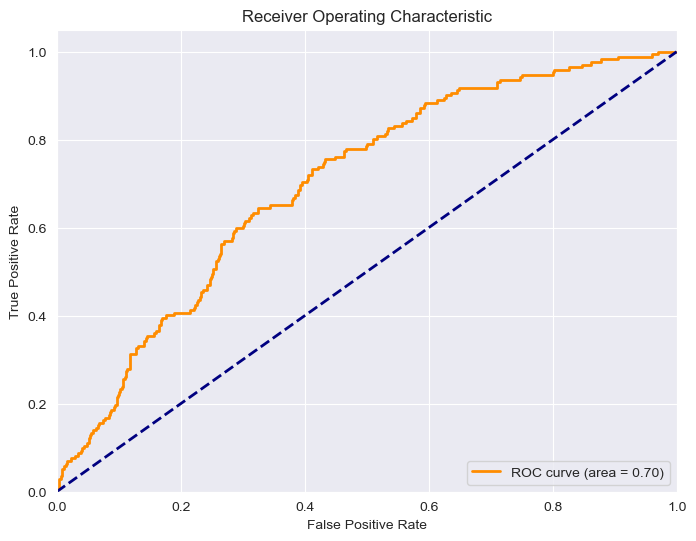

In [323]:
choose_rf_model=RandomForestClassifier(n_estimators=500,max_depth=5,min_samples_leaf=2,min_samples_split=2)
train_classifier(choose_rf_model,X_smote,y_smote,x_test1,y_test)

Accuracy for train is : 0.7397031539888683 %   Accuracy for test is : 0.6754716981132075 % 
recall for train is : 0.787012987012987 %   recall for test is : 0.6395348837209303 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.76      0.69      0.73      2695
           1       0.72      0.79      0.75      2695

    accuracy                           0.74      5390
   macro avg       0.74      0.74      0.74      5390
weighted avg       0.74      0.74      0.74      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       888
           1       0.28      0.64      0.39       172

    accuracy                           0.68      1060
   macro avg       0.59      0.66      0.58      1060
weighted avg       0.81      0.68      0.72      1060


Confusion Matrix for train :
[[1866  829]
 [ 574 2121]]

Confusion Matrix for test :
[[606 282]
 

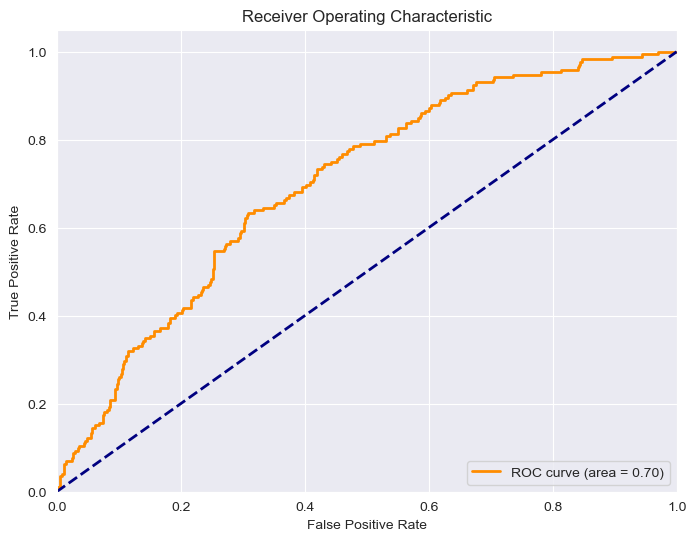

In [324]:
rf_model3=RandomForestClassifier(n_estimators=500,max_depth=5,min_samples_leaf=2,min_samples_split=2)
train_classifier(rf_model3,X_smote_tomek,y_smote_tomek,x_test1,y_test)

Accuracy for train is : 0.8581314878892734 %   Accuracy for test is : 0.8377358490566038 % 
recall for train is : 0.04246284501061571 %   recall for test is : 0.005813953488372093 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2708
           1       1.00      0.04      0.08       471

    accuracy                           0.86      3179
   macro avg       0.93      0.52      0.50      3179
weighted avg       0.88      0.86      0.80      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.50      0.01      0.01       172

    accuracy                           0.84      1060
   macro avg       0.67      0.50      0.46      1060
weighted avg       0.78      0.84      0.77      1060


Confusion Matrix for train :
[[2708    0]
 [ 451   20]]

Confusion Matrix for test :
[[887   

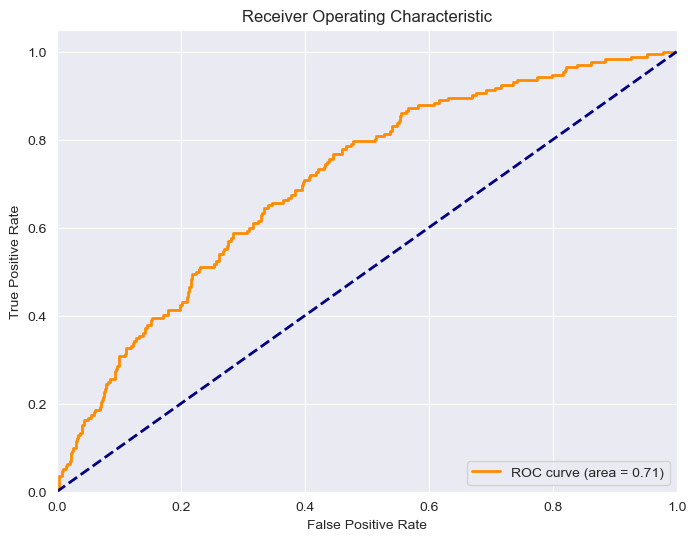

In [325]:
rf_model=RandomForestClassifier(n_estimators=500,max_depth=5,min_samples_leaf=2,min_samples_split=2)
train_classifier(rf_model,x_train,y_train,x_test,y_test)

After applying **Random_forest** to the original data and resampled data the accuracy results of the best **(smote_tomek)** are as follows:
- **Training Accuracy**: 73.8%
- **Testing Accuracy**: 67.1%
- **Training recall**: 77.8%
- **Testing recall**: 60.5%
----

Accuracy for train is : 0.8455231223351919 %   Accuracy for test is : 0.8377358490566038 % 
recall for train is : 0.0 %   recall for test is : 0.0 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2578
           1       0.00      0.00      0.00       471

    accuracy                           0.85      3049
   macro avg       0.42      0.50      0.46      3049
weighted avg       0.71      0.85      0.77      3049


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.00      0.00      0.00       172

    accuracy                           0.84      1060
   macro avg       0.42      0.50      0.46      1060
weighted avg       0.70      0.84      0.76      1060


Confusion Matrix for train :
[[2578    0]
 [ 471    0]]

Confusion Matrix for test :
[[888   0]
 [172   0]]


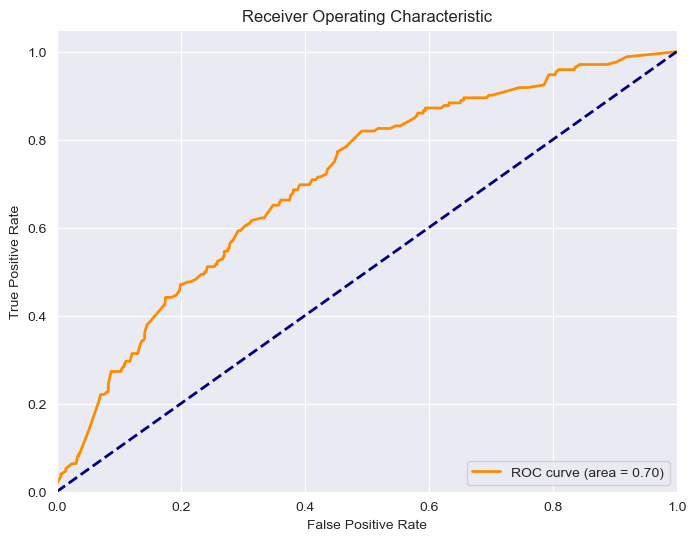

In [326]:
ada_c=AdaBoostClassifier(n_estimators=2000,learning_rate=.001,random_state=42)
train_classifier(ada_c,X_tomek,y_tomek,x_test1,y_test)

Accuracy for train is : 0.6787296898079763 %   Accuracy for test is : 0.6075471698113207 % 
recall for train is : 0.7721565731166913 %   recall for test is : 0.7151162790697675 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.72      0.59      0.65      2708
           1       0.65      0.77      0.71      2708

    accuracy                           0.68      5416
   macro avg       0.69      0.68      0.68      5416
weighted avg       0.69      0.68      0.68      5416


Classification Report for test :
              precision    recall  f1-score   support

           0       0.91      0.59      0.71       888
           1       0.25      0.72      0.37       172

    accuracy                           0.61      1060
   macro avg       0.58      0.65      0.54      1060
weighted avg       0.81      0.61      0.66      1060


Confusion Matrix for train :
[[1585 1123]
 [ 617 2091]]

Confusion Matrix for test :
[[521 367]


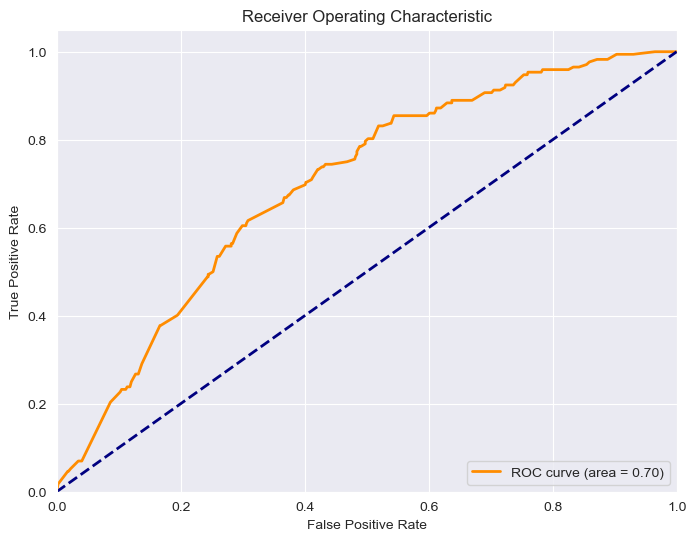

In [327]:
ada_c=AdaBoostClassifier(n_estimators=2000,learning_rate=.001,random_state=42)
train_classifier(ada_c,X_smote,y_smote,x_test1,y_test)

Accuracy for train is : 0.6803339517625232 %   Accuracy for test is : 0.6075471698113207 % 
recall for train is : 0.7736549165120594 %   recall for test is : 0.7151162790697675 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.72      0.59      0.65      2695
           1       0.65      0.77      0.71      2695

    accuracy                           0.68      5390
   macro avg       0.69      0.68      0.68      5390
weighted avg       0.69      0.68      0.68      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.91      0.59      0.71       888
           1       0.25      0.72      0.37       172

    accuracy                           0.61      1060
   macro avg       0.58      0.65      0.54      1060
weighted avg       0.81      0.61      0.66      1060


Confusion Matrix for train :
[[1582 1113]
 [ 610 2085]]

Confusion Matrix for test :
[[521 367]


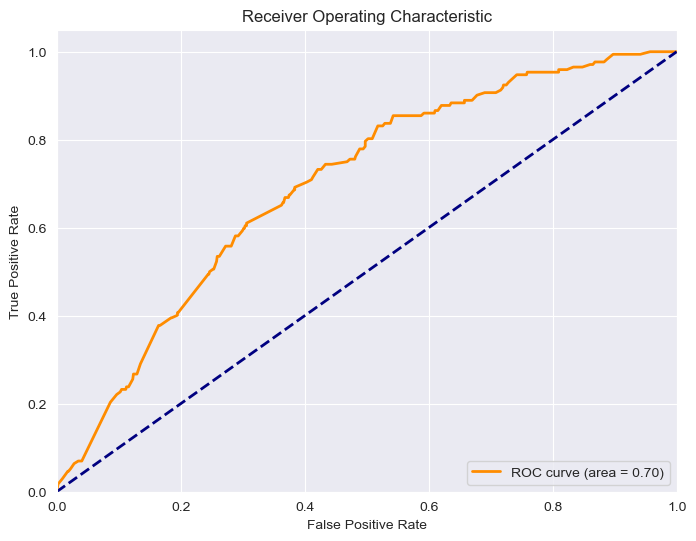

In [328]:
choose_ada_c=AdaBoostClassifier(n_estimators=2000,learning_rate=.001,random_state=42)
train_classifier(choose_ada_c,X_smote_tomek,y_smote_tomek,x_test1,y_test)

Accuracy for train is : 0.8518402013211702 %   Accuracy for test is : 0.8377358490566038 % 
recall for train is : 0.0 %   recall for test is : 0.0 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2708
           1       0.00      0.00      0.00       471

    accuracy                           0.85      3179
   macro avg       0.43      0.50      0.46      3179
weighted avg       0.73      0.85      0.78      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.00      0.00      0.00       172

    accuracy                           0.84      1060
   macro avg       0.42      0.50      0.46      1060
weighted avg       0.70      0.84      0.76      1060


Confusion Matrix for train :
[[2708    0]
 [ 471    0]]

Confusion Matrix for test :
[[888   0]
 [172   0]]


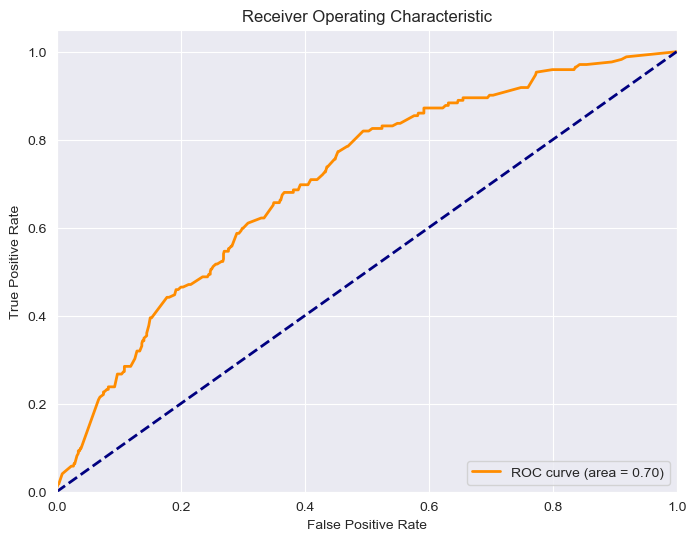

In [329]:
ada_c=AdaBoostClassifier(n_estimators=2000,learning_rate=.001,random_state=42)
train_classifier(ada_c,x_train1,y_train,x_test1,y_test)

After applying **adaBoost** to the original data and resampled data the accuracy results of the best **(smote_tomek)** are as follows:
- **Training Accuracy**: 68%
- **Testing Accuracy**: 60.8%
- **Training recall**: 77.4%
- **Testing recall**: 71.5%
----

Accuracy for train is : 0.8455231223351919 %   Accuracy for test is : 0.8377358490566038 % 
recall for train is : 0.0 %   recall for test is : 0.0 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2578
           1       0.00      0.00      0.00       471

    accuracy                           0.85      3049
   macro avg       0.42      0.50      0.46      3049
weighted avg       0.71      0.85      0.77      3049


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.00      0.00      0.00       172

    accuracy                           0.84      1060
   macro avg       0.42      0.50      0.46      1060
weighted avg       0.70      0.84      0.76      1060


Confusion Matrix for train :
[[2578    0]
 [ 471    0]]

Confusion Matrix for test :
[[888   0]
 [172   0]]


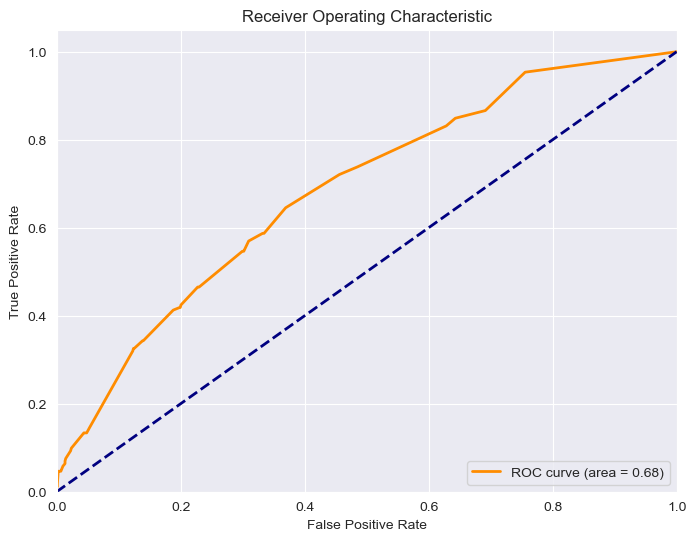

In [330]:
gra_b=GradientBoostingClassifier(n_estimators=1000,learning_rate=.0001,min_samples_split=3,min_samples_leaf=2)
train_classifier(gra_b,X_tomek,y_tomek,x_test1,y_test)

Accuracy for train is : 0.6783604135893648 %   Accuracy for test is : 0.620754716981132 % 
recall for train is : 0.759970457902511 %   recall for test is : 0.6976744186046512 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.71      0.60      0.65      2708
           1       0.65      0.76      0.70      2708

    accuracy                           0.68      5416
   macro avg       0.68      0.68      0.68      5416
weighted avg       0.68      0.68      0.68      5416


Classification Report for test :
              precision    recall  f1-score   support

           0       0.91      0.61      0.73       888
           1       0.26      0.70      0.37       172

    accuracy                           0.62      1060
   macro avg       0.58      0.65      0.55      1060
weighted avg       0.81      0.62      0.67      1060


Confusion Matrix for train :
[[1616 1092]
 [ 650 2058]]

Confusion Matrix for test :
[[538 350]
 [

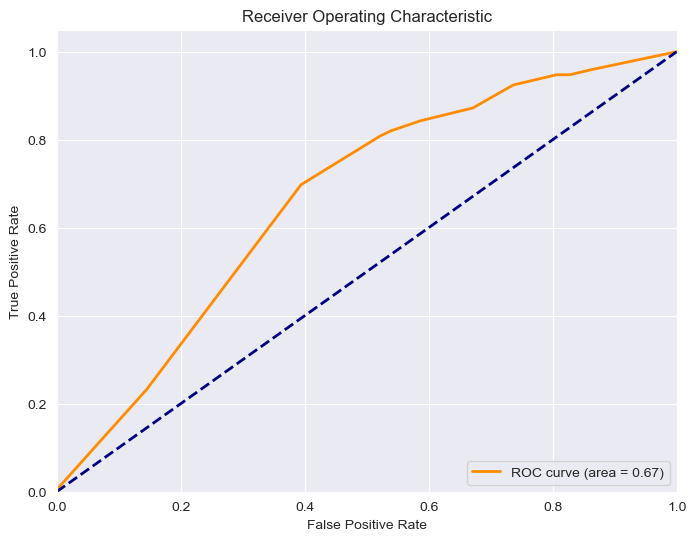

In [331]:
gra_b=GradientBoostingClassifier(n_estimators=1000,learning_rate=.0001,min_samples_split=3,min_samples_leaf=2)
train_classifier(gra_b,X_smote,y_smote,x_test1,y_test)

Accuracy for train is : 0.6788497217068645 %   Accuracy for test is : 0.620754716981132 % 
recall for train is : 0.762152133580705 %   recall for test is : 0.6976744186046512 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.71      0.60      0.65      2695
           1       0.65      0.76      0.70      2695

    accuracy                           0.68      5390
   macro avg       0.68      0.68      0.68      5390
weighted avg       0.68      0.68      0.68      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.91      0.61      0.73       888
           1       0.26      0.70      0.37       172

    accuracy                           0.62      1060
   macro avg       0.58      0.65      0.55      1060
weighted avg       0.81      0.62      0.67      1060


Confusion Matrix for train :
[[1605 1090]
 [ 641 2054]]

Confusion Matrix for test :
[[538 350]
 [

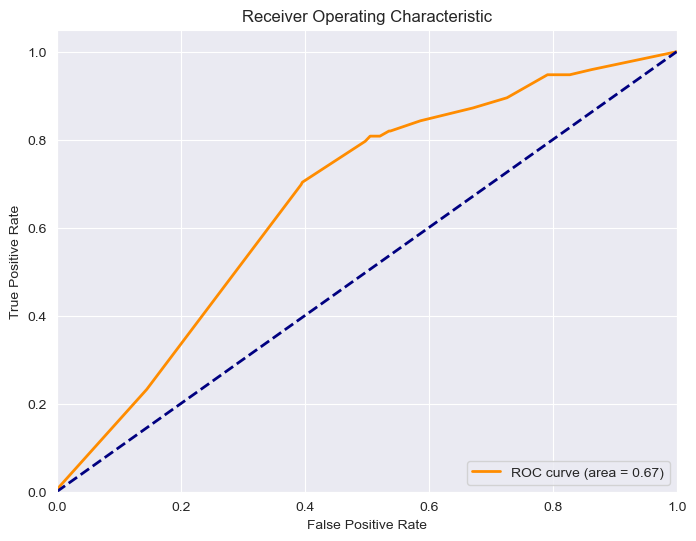

In [332]:
chhose_gra_b=GradientBoostingClassifier(n_estimators=1000,learning_rate=.0001,min_samples_split=3,min_samples_leaf=2)
train_classifier(chhose_gra_b,X_smote_tomek,y_smote_tomek,x_test1,y_test)

Accuracy for train is : 0.8518402013211702 %   Accuracy for test is : 0.8377358490566038 % 
recall for train is : 0.0 %   recall for test is : 0.0 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2708
           1       0.00      0.00      0.00       471

    accuracy                           0.85      3179
   macro avg       0.43      0.50      0.46      3179
weighted avg       0.73      0.85      0.78      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.00      0.00      0.00       172

    accuracy                           0.84      1060
   macro avg       0.42      0.50      0.46      1060
weighted avg       0.70      0.84      0.76      1060


Confusion Matrix for train :
[[2708    0]
 [ 471    0]]

Confusion Matrix for test :
[[888   0]
 [172   0]]


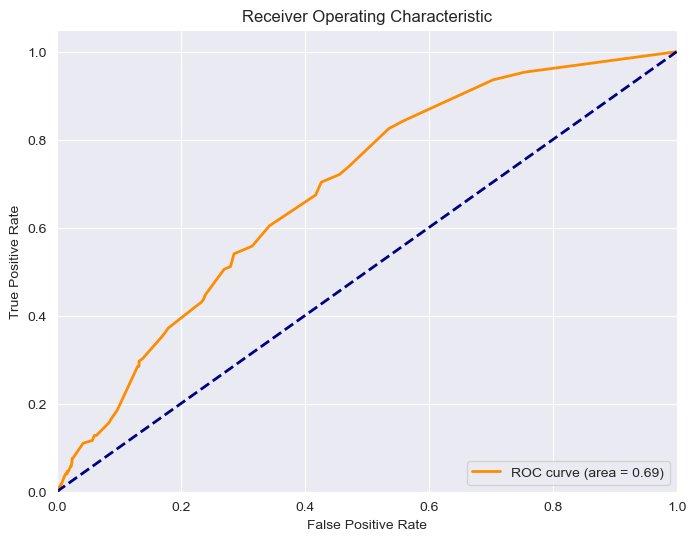

In [333]:
gra_b=GradientBoostingClassifier(n_estimators=1000,learning_rate=.0001,min_samples_split=3,min_samples_leaf=2)
train_classifier(gra_b,x_train1,y_train,x_test1,y_test)

After applying **gradiant_boost** to the original data and resampled data the accuracy results of the best **(smote_tomek)** are as follows:
- **Training Accuracy**: 67.9%
- **Testing Accuracy**: 62%
- **Training recall**: 76.2%
- **Testing recall**: 69.8%
----

Accuracy for train is : 0.8497868153492949 %   Accuracy for test is : 0.839622641509434 % 
recall for train is : 0.03184713375796178 %   recall for test is : 0.01744186046511628 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2578
           1       0.88      0.03      0.06       471

    accuracy                           0.85      3049
   macro avg       0.87      0.52      0.49      3049
weighted avg       0.85      0.85      0.79      3049


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.75      0.02      0.03       172

    accuracy                           0.84      1060
   macro avg       0.79      0.51      0.47      1060
weighted avg       0.83      0.84      0.77      1060


Confusion Matrix for train :
[[2576    2]
 [ 456   15]]

Confusion Matrix for test :
[[887   1]

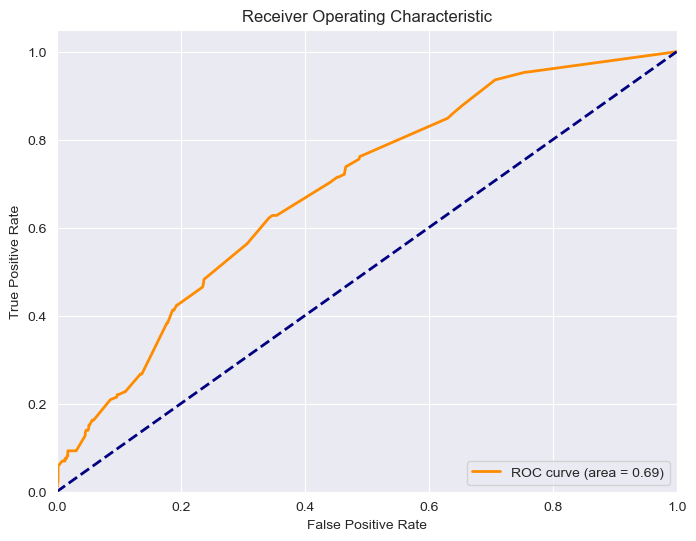

In [334]:
xgmodel = XGBClassifier(
    max_depth=3,
    learning_rate=0.0001,
    n_estimators=3000,
    random_state=42,
    
    )
train_classifier(xgmodel,X_tomek,y_tomek,x_test1,y_test)

Accuracy for train is : 0.6838995568685377 %   Accuracy for test is : 0.6169811320754717 % 
recall for train is : 0.7758493353028065 %   recall for test is : 0.7034883720930233 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.73      0.59      0.65      2708
           1       0.66      0.78      0.71      2708

    accuracy                           0.68      5416
   macro avg       0.69      0.68      0.68      5416
weighted avg       0.69      0.68      0.68      5416


Classification Report for test :
              precision    recall  f1-score   support

           0       0.91      0.60      0.72       888
           1       0.25      0.70      0.37       172

    accuracy                           0.62      1060
   macro avg       0.58      0.65      0.55      1060
weighted avg       0.81      0.62      0.67      1060


Confusion Matrix for train :
[[1603 1105]
 [ 607 2101]]

Confusion Matrix for test :
[[533 355]


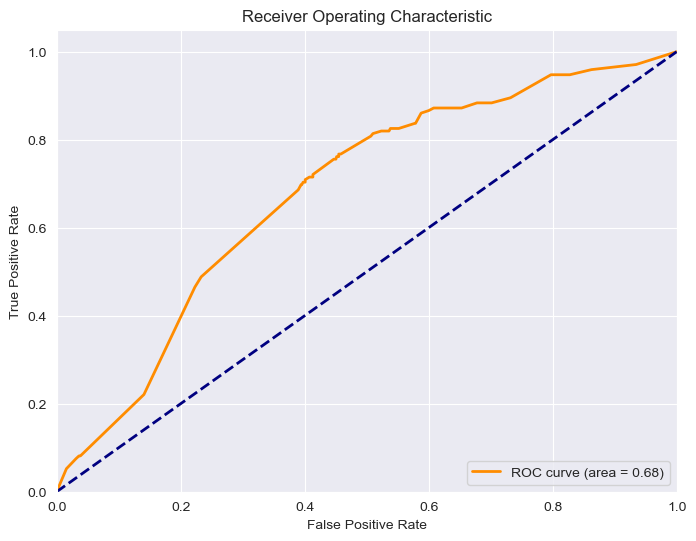

In [335]:
xgmodel = XGBClassifier(
    max_depth=3,
    learning_rate=0.0001,
    n_estimators=3000,
    random_state=42,
    
    )
train_classifier(xgmodel,X_smote,y_smote,x_test1,y_test)

Accuracy for train is : 0.6846011131725418 %   Accuracy for test is : 0.6169811320754717 % 
recall for train is : 0.7784786641929499 %   recall for test is : 0.7034883720930233 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.73      0.59      0.65      2695
           1       0.66      0.78      0.71      2695

    accuracy                           0.68      5390
   macro avg       0.69      0.68      0.68      5390
weighted avg       0.69      0.68      0.68      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.91      0.60      0.72       888
           1       0.25      0.70      0.37       172

    accuracy                           0.62      1060
   macro avg       0.58      0.65      0.55      1060
weighted avg       0.81      0.62      0.67      1060


Confusion Matrix for train :
[[1592 1103]
 [ 597 2098]]

Confusion Matrix for test :
[[533 355]


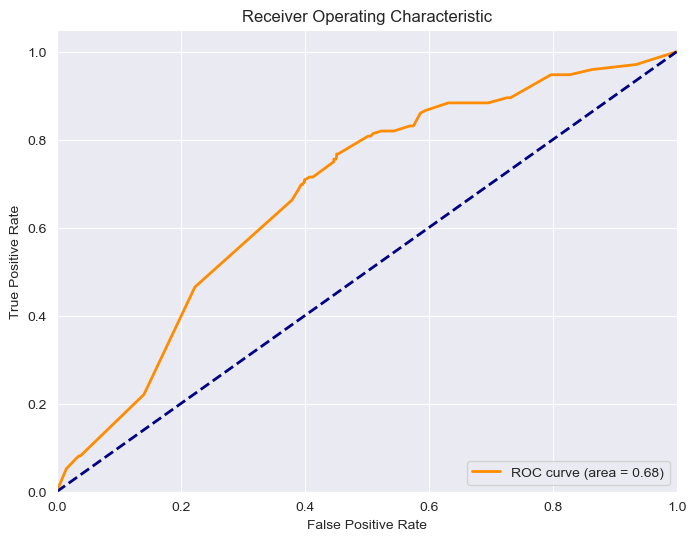

In [336]:
choose_xgmodel = XGBClassifier(
    max_depth=3,
    learning_rate=0.0001,
    n_estimators=3000,
    random_state=42,
    
    )
train_classifier(choose_xgmodel,X_smote_tomek,y_smote_tomek,x_test1,y_test)

Accuracy for train is : 0.8546712802768166 %   Accuracy for test is : 0.8367924528301887 % 
recall for train is : 0.025477707006369428 %   recall for test is : 0.0 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2708
           1       0.80      0.03      0.05       471

    accuracy                           0.85      3179
   macro avg       0.83      0.51      0.49      3179
weighted avg       0.85      0.85      0.79      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.00      0.00      0.00       172

    accuracy                           0.84      1060
   macro avg       0.42      0.50      0.46      1060
weighted avg       0.70      0.84      0.76      1060


Confusion Matrix for train :
[[2705    3]
 [ 459   12]]

Confusion Matrix for test :
[[887   1]
 [172   0]]


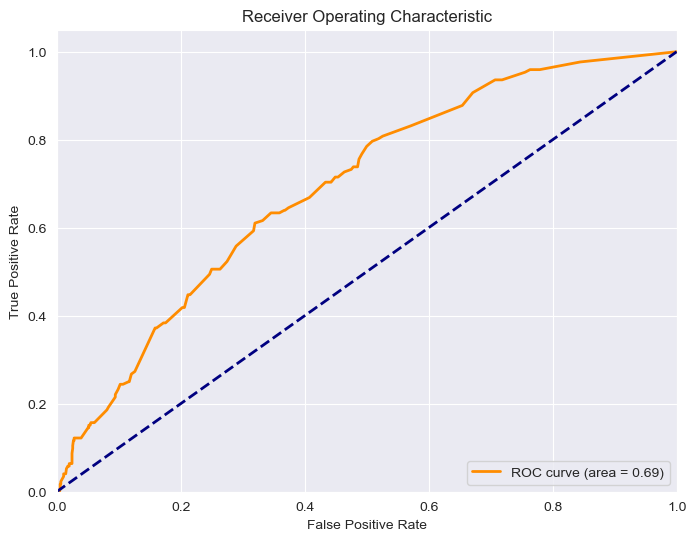

In [337]:
xgmodel = XGBClassifier(
    max_depth=3,
    learning_rate=0.0001,
    n_estimators=3000,
    random_state=42,
    
    )
train_classifier(xgmodel,x_train1,y_train,x_test1,y_test)

After applying **XGBoost** to the original data and resampled data the accuracy results of the best **(smote_tomek)** are as follows:
- **Training Accuracy**: 68.5%
- **Testing Accuracy**: 61.7%
- **Training recall**: 77.8%
- **Testing recall**: 70.3%
----

| Model              | Training Accuracy | Testing Accuracy | Training Recall | Testing Recall |
|--------------------|-------------------|------------------|-----------------|----------------|
| Logistic Regression| 67.8%             | 65.3%            | 67.9%           | 61.6%          |
| SVC                | 74.4%             | 53.8%            | 92.3%           | 82.6%          |
| Random Forest      | 73.8%             | 67.1%            | 77.8%           | 60.5%          |
| AdaBoost           | 68.0%             | 60.8%            | 77.4%           | 71.5%          |
| GradientBoost      | 67.9%             | 62.0%            | 76.2%           | 69.8%          |
| XGBoost            | 68.5%             | 61.7%            | 77.8%           | 70.3%          |

In [338]:
performance = {
    "Model": ["Logistic Regression", "SVC", "Random Forest", "AdaBoost", "GradientBoost", "XGBoost"],
    "Training Accuracy": [67.8, 74.4, 73.8, 68.0, 67.9, 68.5],
    "Testing Accuracy": [65.3, 53.8, 67.1, 60.8, 62.0, 61.7],
    "Training Recall": [67.9, 92.3, 77.8, 77.4, 76.2, 77.8],
    "Testing Recall": [61.6, 82.6, 60.5, 71.5, 69.8, 70.3]
}
df_performance = pd.DataFrame(performance)
display(df_performance)

Model  Training Accuracy  Testing Accuracy  Training Recall  \
0  Logistic Regression               67.8              65.3             67.9   
1                  SVC               74.4              53.8             92.3   
2        Random Forest               73.8              67.1             77.8   
3             AdaBoost               68.0              60.8             77.4   
4        GradientBoost               67.9              62.0             76.2   
5              XGBoost               68.5              61.7             77.8   

   Testing Recall  
0            61.6  
1            82.6  
2            60.5  
3            71.5  
4            69.8  
5            70.3

### Confusion Matrices

| Model               | True Negatives | False Positives | False Negatives | True Positives |
|----------------------|----------------|-----------------|-----------------|----------------|
| Logistic Regression | 586            | 302             | 66              | 106            |
| SVC                 | 428            | 460             | 30              | 142            |
| Random Forest       | 607            | 281             | 68              | 104            |
| AdaBoost            | 521            | 367             | 49              | 123            |
| Gradient Boost      | 538            | 350             | 52              | 120            |
| XGBoost             | 533            | 355             | 51              | 121            |

In [339]:
data = {
    "Model": [
        "Logistic Regression", 
        "SVC", 
        "Random Forest", 
        "AdaBoost", 
        "Gradient Boost", 
        "XGBoost"
    ],
    "True Negatives": [586, 428, 607, 521, 538, 533],
    "False Positives": [302, 460, 281, 367, 350, 355],
    "False Negatives": [66, 30, 68, 49, 52, 51],
    "True Positives": [106, 142, 104, 123, 120, 121]
}
# Creating the DataFrame
confusion_df = pd.DataFrame(data)
# Displaying the DataFrame
display(confusion_df)

Model  True Negatives  False Positives  False Negatives  \
0  Logistic Regression             586              302               66   
1                  SVC             428              460               30   
2        Random Forest             607              281               68   
3             AdaBoost             521              367               49   
4       Gradient Boost             538              350               52   
5              XGBoost             533              355               51   

   True Positives  
0             106  
1             142  
2             104  
3             123  
4             120  
5             121

### Model Selection: Logistic Regression as the Best Model

Based on the results, we consider **Logistic Regression** to be the best model for this dataset. by givinig me best accurarcy for testing  Both **Random Forest** and **SVC** models showed signs of overfitting, making them less suitable for this analysis. Logistic Regression, on the other hand, provides a more stable and reliable performance on both the training and testing sets.

### now we can try reduce dimensions by using  principal component analysis [PCA]

Explained Variance Ratio: [0.29610516 0.13741578]
Cumulative Explained Variance: [0.29610516 0.43352093]


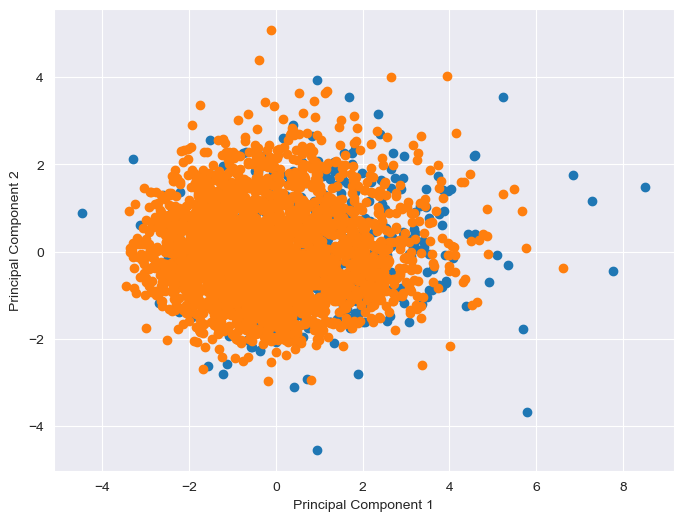

In [340]:

pca = PCA(n_components=2)  # Reduce to 2 principal components
x_train_pca = pca.fit_transform(x_train1)
x_test_pca = pca.transform(x_test1)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))


plt.figure(figsize=(8, 6))
for i, label in enumerate(y_train.unique()):
    plt.scatter(x_train_pca[y_train == label, 0], x_train_pca[y_train == label, 1])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### this for original data 

Explained Variance Ratio: [0.29823301 0.16435858]
Cumulative Explained Variance: [0.29823301 0.46259158]


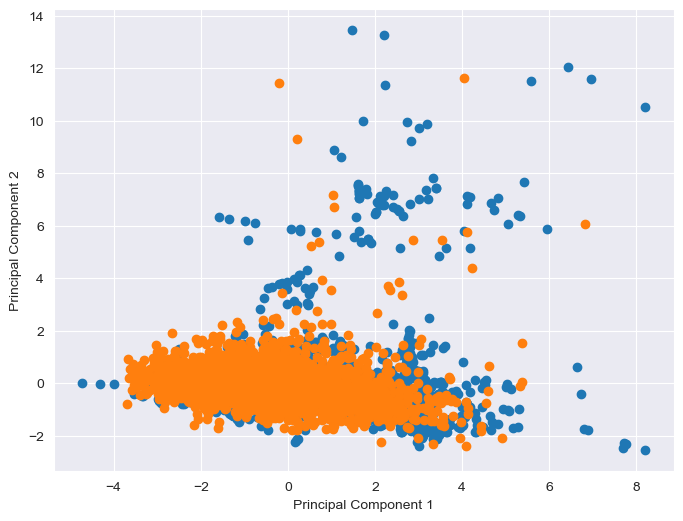

In [341]:

pca = PCA(n_components=2)  # Reduce to 2 principal components
X_smote_tomek_pca = pca.fit_transform(X_smote_tomek)
x_test_pca = pca.transform(x_test1)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))


plt.figure(figsize=(8, 6))
for i, label in enumerate(y_smote_tomek.unique()):
    plt.scatter(X_smote_tomek_pca[y_smote_tomek == label, 0], X_smote_tomek_pca[y_smote_tomek == label, 1])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### this for smote_tomek data_resampled

Accuracy for train is : 0.6181818181818182 %   Accuracy for test is : 0.6632075471698113 % 
recall for train is : 0.5784786641929499 %   recall for test is : 0.563953488372093 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.61      0.66      0.63      2695
           1       0.63      0.58      0.60      2695

    accuracy                           0.62      5390
   macro avg       0.62      0.62      0.62      5390
weighted avg       0.62      0.62      0.62      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       888
           1       0.26      0.56      0.35       172

    accuracy                           0.66      1060
   macro avg       0.57      0.62      0.56      1060
weighted avg       0.79      0.66      0.70      1060


Confusion Matrix for train :
[[1773  922]
 [1136 1559]]

Confusion Matrix for test :
[[606 282]
 

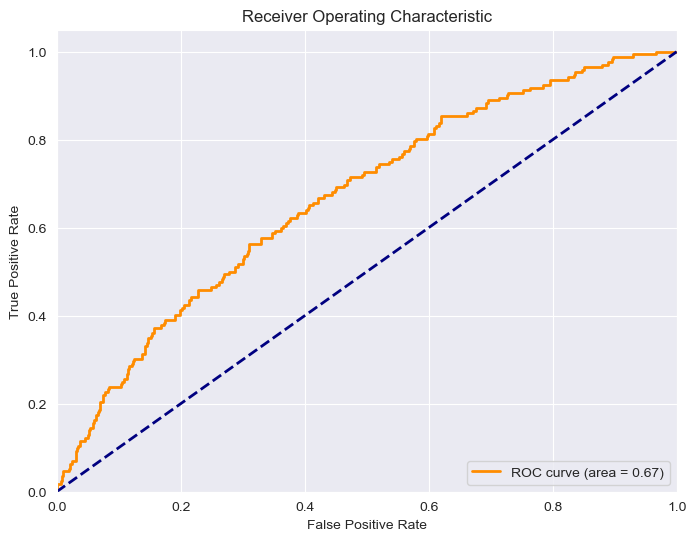

In [342]:
log_r=LogisticRegression(random_state=42)
train_classifier(log_r,X_smote_tomek_pca,y_smote_tomek,x_test_pca,y_test)

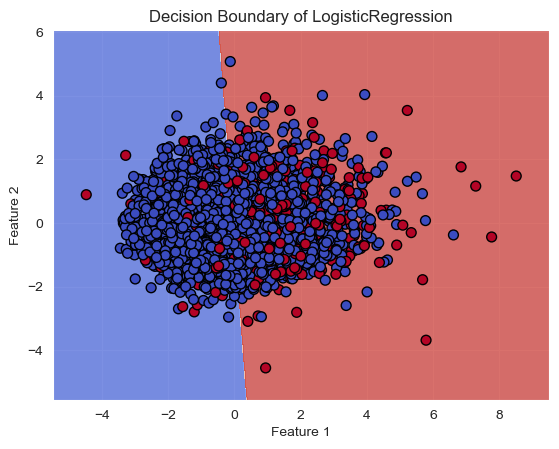

In [343]:
plot_decision_boundary(log_r,x_train_pca,y_train)

### showing how logistic regresion takes the decision boundary on the original pca_data

Accuracy for train is : 0.6484230055658627 %   Accuracy for test is : 0.6462264150943396 % 
recall for train is : 0.6256029684601113 %   recall for test is : 0.5697674418604651 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.64      0.67      0.66      2695
           1       0.66      0.63      0.64      2695

    accuracy                           0.65      5390
   macro avg       0.65      0.65      0.65      5390
weighted avg       0.65      0.65      0.65      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.89      0.66      0.76       888
           1       0.25      0.57      0.34       172

    accuracy                           0.65      1060
   macro avg       0.57      0.62      0.55      1060
weighted avg       0.78      0.65      0.69      1060


Confusion Matrix for train :
[[1809  886]
 [1009 1686]]

Confusion Matrix for test :
[[587 301]


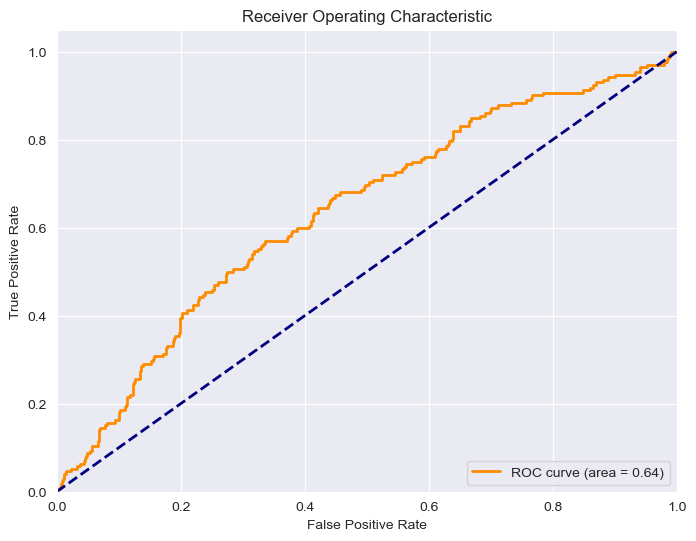

In [344]:
svc=SVC(C=10,gamma=1,kernel="rbf",probability=True)
train_classifier(svc,X_smote_tomek_pca,y_smote_tomek,x_test_pca,y_test)

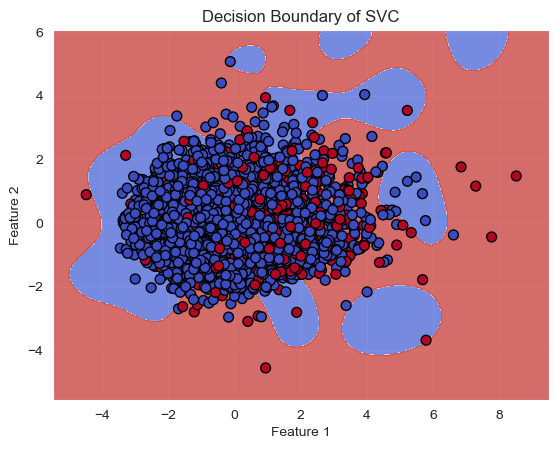

In [345]:
plot_decision_boundary(svc,x_train_pca,y_train)

### showing how SVC takes the decision boundary on the original pca_data

Accuracy for train is : 0.8517625231910946 %   Accuracy for test is : 0.6226415094339622 % 
recall for train is : 0.8645640074211502 %   recall for test is : 0.5523255813953488 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2695
           1       0.84      0.86      0.85      2695

    accuracy                           0.85      5390
   macro avg       0.85      0.85      0.85      5390
weighted avg       0.85      0.85      0.85      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       888
           1       0.23      0.55      0.32       172

    accuracy                           0.62      1060
   macro avg       0.55      0.59      0.53      1060
weighted avg       0.77      0.62      0.67      1060


Confusion Matrix for train :
[[2261  434]
 [ 365 2330]]

Confusion Matrix for test :
[[565 323]


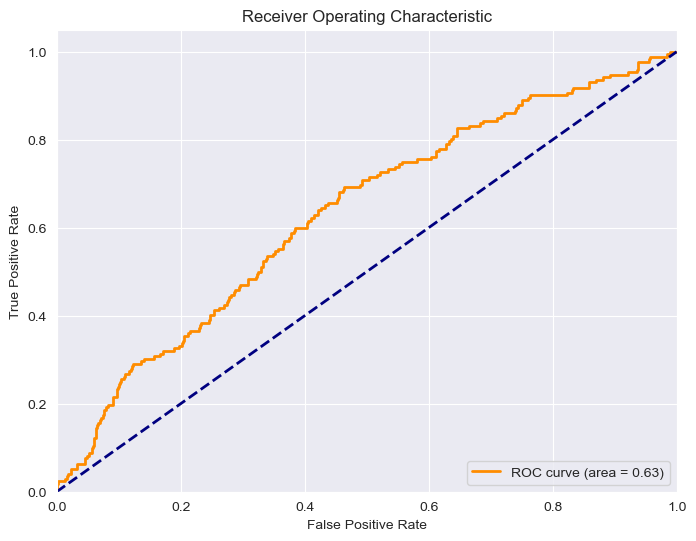

In [346]:
rf_model=RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_leaf=3,min_samples_split=4)
train_classifier(rf_model,X_smote_tomek_pca,y_smote_tomek,x_test_pca,y_test)

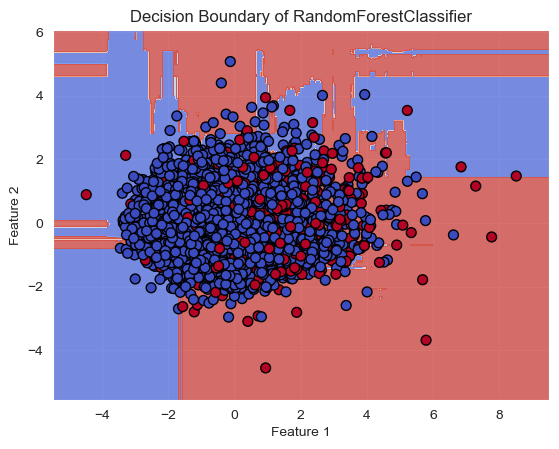

In [347]:
plot_decision_boundary(rf_model,x_train_pca,y_train)

### showing how Random Forest takes the decision boundary on the original pca_data

Accuracy for train is : 0.6304267161410019 %   Accuracy for test is : 0.6122641509433963 % 
recall for train is : 0.6549165120593692 %   recall for test is : 0.6162790697674418 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.64      0.61      0.62      2695
           1       0.62      0.65      0.64      2695

    accuracy                           0.63      5390
   macro avg       0.63      0.63      0.63      5390
weighted avg       0.63      0.63      0.63      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.89      0.61      0.73       888
           1       0.24      0.62      0.34       172

    accuracy                           0.61      1060
   macro avg       0.56      0.61      0.53      1060
weighted avg       0.79      0.61      0.66      1060


Confusion Matrix for train :
[[1633 1062]
 [ 930 1765]]

Confusion Matrix for test :
[[543 345]


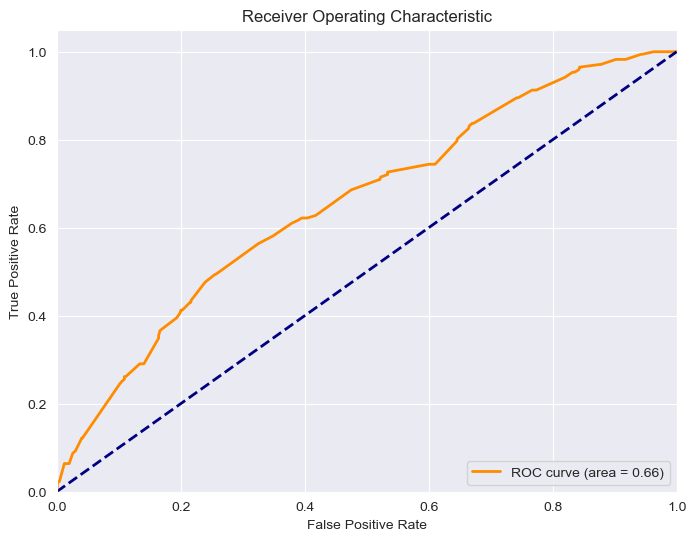

In [348]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=.1,random_state=42)
train_classifier(ada,X_smote_tomek_pca,y_smote_tomek,x_test_pca,y_test)

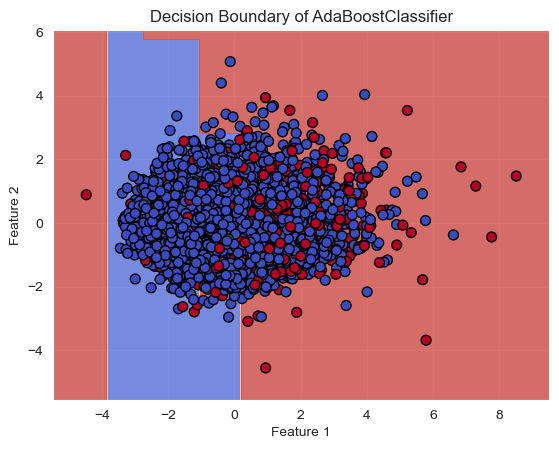

In [349]:
plot_decision_boundary(ada,x_train_pca,y_train)

### showing how adaBoost takes the decision boundary on the original pca_data

Accuracy for train is : 0.7326530612244898 %   Accuracy for test is : 0.6150943396226415 % 
recall for train is : 0.7350649350649351 %   recall for test is : 0.5523255813953488 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      2695
           1       0.73      0.74      0.73      2695

    accuracy                           0.73      5390
   macro avg       0.73      0.73      0.73      5390
weighted avg       0.73      0.73      0.73      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.88      0.63      0.73       888
           1       0.22      0.55      0.32       172

    accuracy                           0.62      1060
   macro avg       0.55      0.59      0.52      1060
weighted avg       0.77      0.62      0.66      1060


Confusion Matrix for train :
[[1968  727]
 [ 714 1981]]

Confusion Matrix for test :
[[557 331]


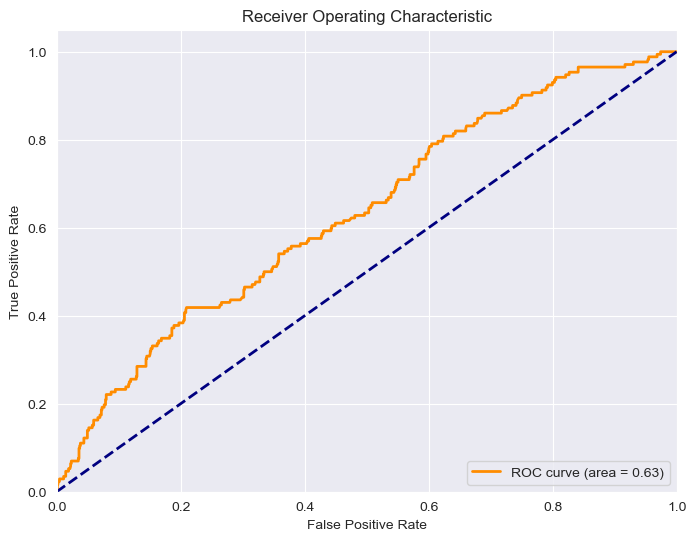

In [350]:
gra_b=GradientBoostingClassifier(n_estimators=3000,learning_rate=.01,min_samples_split=3,min_samples_leaf=2)
train_classifier(gra_b,X_smote_tomek_pca,y_smote_tomek,x_test_pca,y_test)

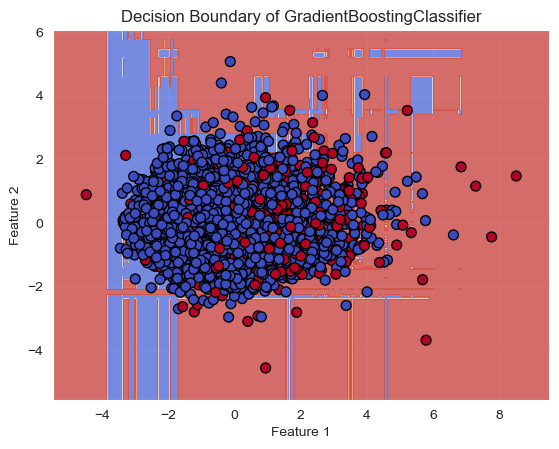

In [351]:
plot_decision_boundary(gra_b,x_train_pca,y_train)

### showing how GradiantBoost takes the decision boundary on the original pca_data

Accuracy for train is : 0.7070500927643785 %   Accuracy for test is : 0.6066037735849057 % 
recall for train is : 0.7139146567717997 %   recall for test is : 0.5813953488372093 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      2695
           1       0.70      0.71      0.71      2695

    accuracy                           0.71      5390
   macro avg       0.71      0.71      0.71      5390
weighted avg       0.71      0.71      0.71      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.88      0.61      0.72       888
           1       0.22      0.58      0.32       172

    accuracy                           0.61      1060
   macro avg       0.55      0.60      0.52      1060
weighted avg       0.78      0.61      0.66      1060


Confusion Matrix for train :
[[1887  808]
 [ 771 1924]]

Confusion Matrix for test :
[[543 345]


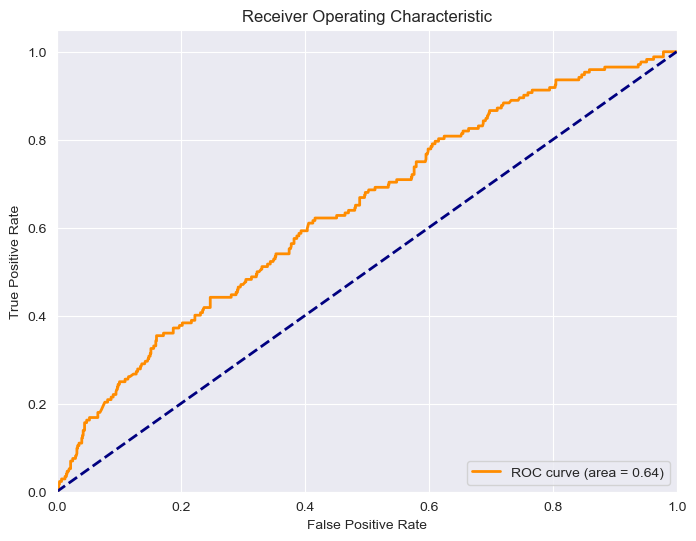

In [352]:
xgmodel = XGBClassifier(
    max_depth=3,
    learning_rate=0.01,
    n_estimators=3000,
    random_state=42,
    
    )
train_classifier(xgmodel,X_smote_tomek_pca,y_smote_tomek,x_test_pca,y_test)

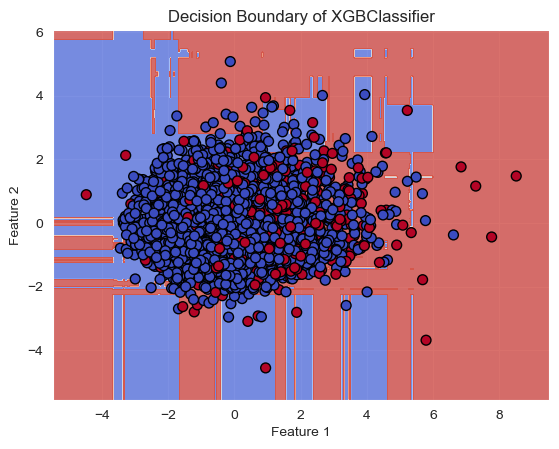

In [353]:
plot_decision_boundary(xgmodel,x_train_pca,y_train)

### showing how XGBoost takes the decision boundary on the original pca_data

### Reducing Dimensions Using PCA to 2D for Data Visualization

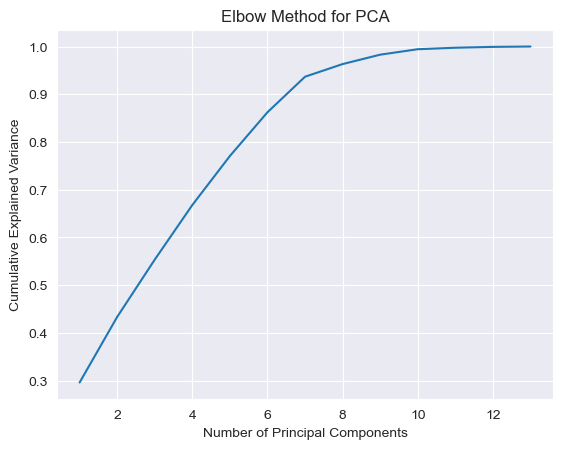

In [354]:
pca = PCA()
pca.fit(x_train1)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for PCA')
plt.grid(True)
plt.show()



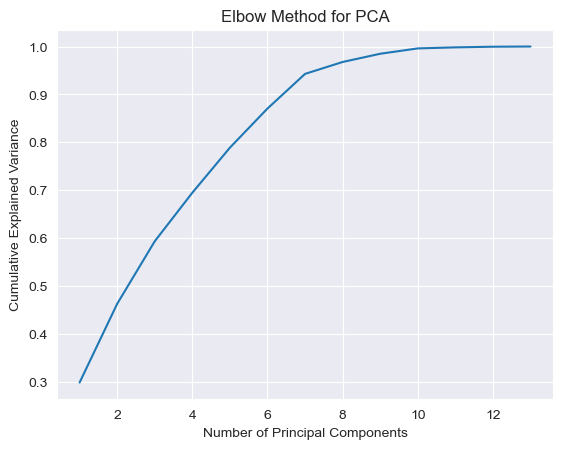

In [355]:
pca = PCA()
pca.fit(X_smote_tomek)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for PCA')
plt.grid(True)
plt.show()


### Using the Elbow Technique to Find the Best Number of Dimensions

We apply the **Elbow Technique** to determine the optimal number of dimensions for PCA. This method involves plotting the explained variance against the number of dimensions and identifying the "elbow point," where the variance begins to plateau. This helps us choose the most appropriate number of dimensions for our analysis.

In [356]:
pca = PCA(n_components=7)  # Reduce to 7 principal components
x_train_pca = pca.fit_transform(x_train1)
x_test_pca = pca.transform(x_test1)

### this for the original data 

In [357]:
pca2 = PCA(n_components=7)  # Reduce to 7 principal components
x_train_st_pca = pca2.fit_transform(X_smote_tomek)
x_test_st_pca = pca2.transform(x_test1)

### this for the smote_tomek resampled data 

### New Data After PCA Transformation

After applying **Principal Component Analysis (PCA)**, we now have the transformed data:
- **x_train_pca**: The PCA-transformed training data.
- **x_test_pca**: The PCA-transformed testing data.

These datasets are now reduced to the optimal number of dimensions for further analysis and modeling (7 features).

In [358]:
print(x_train_pca.shape)
print(x_test_pca.shape)

(3179, 7)
(1060, 7)


Accuracy for train is : 0.859389745202894 %   Accuracy for test is : 0.840566037735849 % 
recall for train is : 0.07855626326963906 %   recall for test is : 0.040697674418604654 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2708
           1       0.74      0.08      0.14       471

    accuracy                           0.86      3179
   macro avg       0.80      0.54      0.53      3179
weighted avg       0.84      0.86      0.81      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.64      0.04      0.08       172

    accuracy                           0.84      1060
   macro avg       0.74      0.52      0.49      1060
weighted avg       0.81      0.84      0.78      1060


Confusion Matrix for train :
[[2695   13]
 [ 434   37]]

Confusion Matrix for test :
[[884   4]

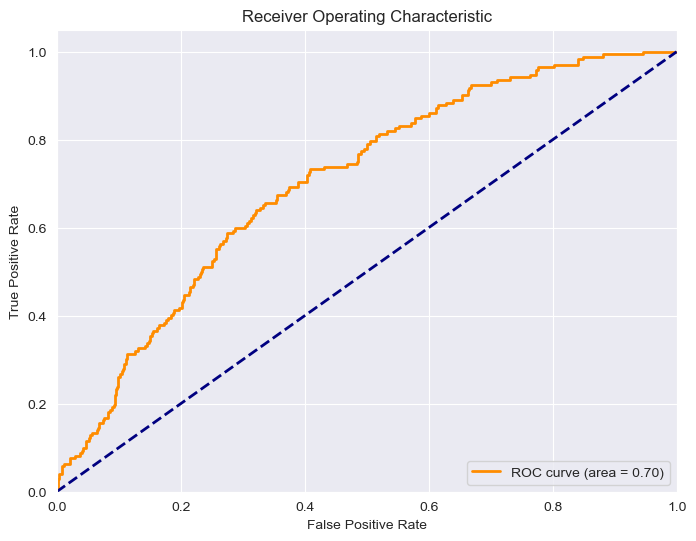

In [359]:
log_r=LogisticRegression(random_state=42,max_iter=1000,penalty="l2",tol=.000001)
train_classifier(log_r,x_train_pca,y_train,x_test_pca,y_test)

Accuracy for train is : 0.673469387755102 %   Accuracy for test is : 0.6669811320754717 % 
recall for train is : 0.6797773654916512 %   recall for test is : 0.6395348837209303 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.68      0.67      0.67      2695
           1       0.67      0.68      0.68      2695

    accuracy                           0.67      5390
   macro avg       0.67      0.67      0.67      5390
weighted avg       0.67      0.67      0.67      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.91      0.67      0.77       888
           1       0.27      0.64      0.38       172

    accuracy                           0.67      1060
   macro avg       0.59      0.66      0.58      1060
weighted avg       0.80      0.67      0.71      1060


Confusion Matrix for train :
[[1798  897]
 [ 863 1832]]

Confusion Matrix for test :
[[597 291]
 

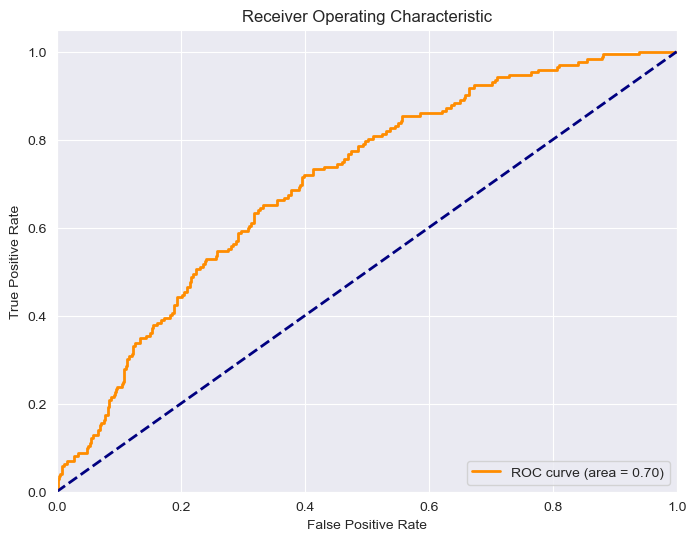

In [360]:
log_r_st=LogisticRegression(random_state=42,max_iter=1000,penalty="l2",tol=.000001)
train_classifier(log_r_st,x_train_st_pca,y_smote_tomek,x_test_st_pca,y_test)

After applying **Logistic Regression** to the smote_tomek resampled data after dimensionality reduction , the accuracy results are as follows:
- **Training_pca Accuracy**: 67.5%
- **Testing_pca Accuracy**: 66.8%
- **Training recall**: 68.2%
- **Testing recall**: 64%

Accuracy for train is : 0.9943378420887071 %   Accuracy for test is : 0.7981132075471699 % 
recall for train is : 0.9617834394904459 %   recall for test is : 0.11046511627906977 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2708
           1       1.00      0.96      0.98       471

    accuracy                           0.99      3179
   macro avg       1.00      0.98      0.99      3179
weighted avg       0.99      0.99      0.99      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       888
           1       0.24      0.11      0.15       172

    accuracy                           0.80      1060
   macro avg       0.54      0.52      0.52      1060
weighted avg       0.75      0.80      0.77      1060


Confusion Matrix for train :
[[2708    0]
 [  18  453]]

Confusion Matrix for test :
[[827  61]

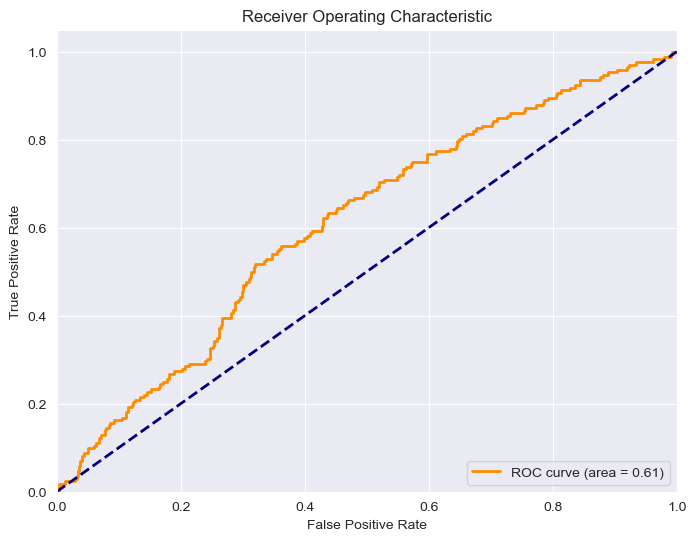

In [361]:
svc=SVC(C=10,gamma=1,kernel="rbf",probability=True)
train_classifier(svc,x_train_pca,y_train,x_test_pca,y_test)

Accuracy for train is : 0.9675324675324676 %   Accuracy for test is : 0.7650943396226415 % 
recall for train is : 0.9881261595547309 %   recall for test is : 0.20930232558139536 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2695
           1       0.95      0.99      0.97      2695

    accuracy                           0.97      5390
   macro avg       0.97      0.97      0.97      5390
weighted avg       0.97      0.97      0.97      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       888
           1       0.24      0.21      0.22       172

    accuracy                           0.77      1060
   macro avg       0.55      0.54      0.54      1060
weighted avg       0.75      0.77      0.76      1060


Confusion Matrix for train :
[[2552  143]
 [  32 2663]]

Confusion Matrix for test :
[[775 113]

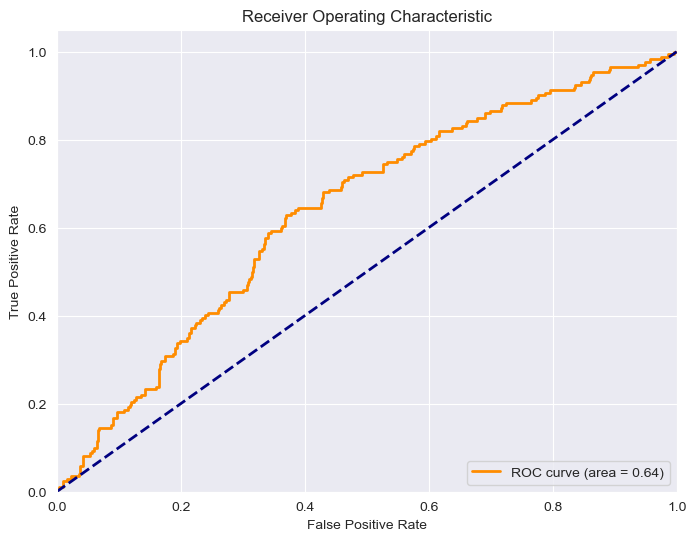

In [362]:
choose_svc=SVC(C=1,gamma=1,kernel="rbf",probability=True)
train_classifier(choose_svc,x_train_st_pca,y_smote_tomek,x_test_st_pca,y_test)

After applying **SVC** to the smote_tomek resampled data after dimensionality reduction , the accuracy results are as follows:
- **Training_pca Accuracy**: 82.8%
- **Testing_pca Accuracy**: 65.8%
- **Training recall**: 89.6%
- **Testing recall**: 50.6%

Accuracy for train is : 0.714100185528757 %   Accuracy for test is : 0.6358490566037736 % 
recall for train is : 0.7636363636363637 %   recall for test is : 0.6162790697674418 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      2695
           1       0.69      0.76      0.73      2695

    accuracy                           0.71      5390
   macro avg       0.72      0.71      0.71      5390
weighted avg       0.72      0.71      0.71      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.90      0.64      0.75       888
           1       0.25      0.62      0.35       172

    accuracy                           0.64      1060
   macro avg       0.57      0.63      0.55      1060
weighted avg       0.79      0.64      0.68      1060


Confusion Matrix for train :
[[1791  904]
 [ 637 2058]]

Confusion Matrix for test :
[[568 320]
 

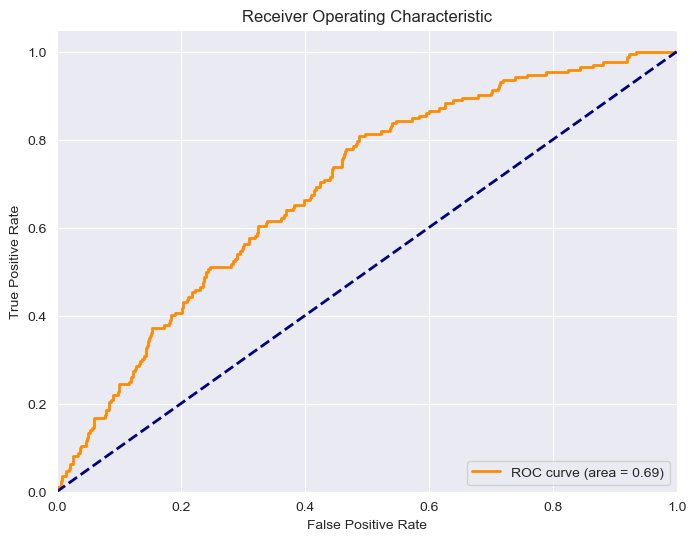

In [363]:
rf_model=RandomForestClassifier(n_estimators=200,max_depth=4,min_samples_leaf=4,min_samples_split=4)
train_classifier(rf_model,x_train_st_pca,y_smote_tomek,x_test_st_pca,y_test)

Accuracy for train is : 0.9065743944636678 %   Accuracy for test is : 0.8349056603773585 % 
recall for train is : 0.37367303609341823 %   recall for test is : 0.029069767441860465 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2708
           1       0.99      0.37      0.54       471

    accuracy                           0.91      3179
   macro avg       0.95      0.69      0.75      3179
weighted avg       0.91      0.91      0.89      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       888
           1       0.38      0.03      0.05       172

    accuracy                           0.83      1060
   macro avg       0.61      0.51      0.48      1060
weighted avg       0.77      0.83      0.77      1060


Confusion Matrix for train :
[[2706    2]
 [ 295  176]]

Confusion Matrix for test :
[[880   

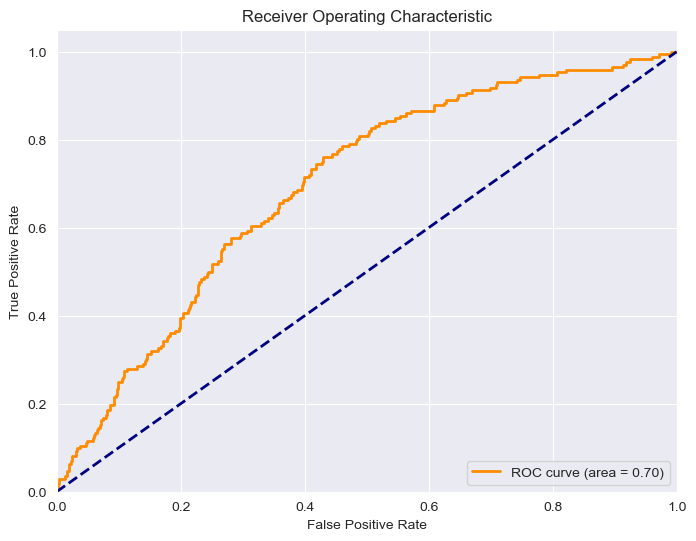

In [364]:
rf_model=RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_leaf=3,min_samples_split=4)
train_classifier(rf_model,x_train_pca,y_train,x_test_pca,y_test)

After applying **RandomForest** to the smote_tomek resampled data after dimensionality reduction , the accuracy results are as follows:
- **Training_pca Accuracy**: 71.6%
- **Testing_pca Accuracy**: 64.2%
- **Training recall**: 76.2%
- **Testing recall**: 64%

Accuracy for train is : 0.8518402013211702 %   Accuracy for test is : 0.8377358490566038 % 
recall for train is : 0.0 %   recall for test is : 0.0 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2708
           1       0.00      0.00      0.00       471

    accuracy                           0.85      3179
   macro avg       0.43      0.50      0.46      3179
weighted avg       0.73      0.85      0.78      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.00      0.00      0.00       172

    accuracy                           0.84      1060
   macro avg       0.42      0.50      0.46      1060
weighted avg       0.70      0.84      0.76      1060


Confusion Matrix for train :
[[2708    0]
 [ 471    0]]

Confusion Matrix for test :
[[888   0]
 [172   0]]


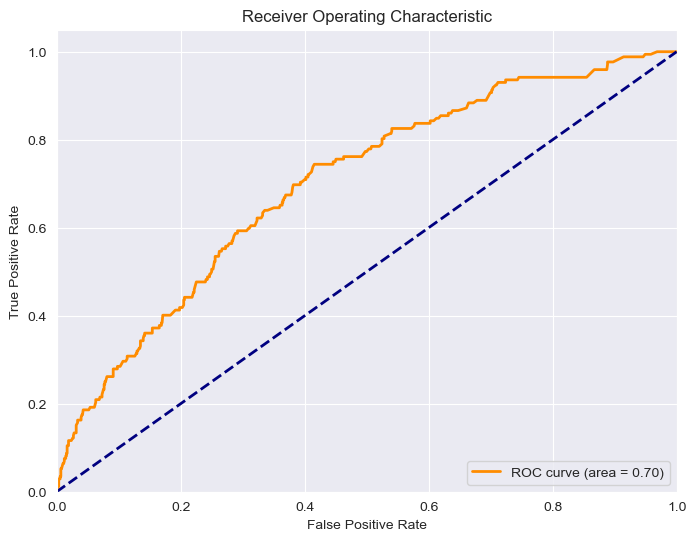

In [ ]:
ada=AdaBoostClassifier(n_estimators=5000,learning_rate=.0008,random_state=42)
train_classifier(ada,x_train_pca,y_train,x_test_pca,y_test)

Accuracy for train is : 0.6551020408163265 %   Accuracy for test is : 0.6169811320754717 % 
recall for train is : 0.7009276437847867 %   recall for test is : 0.6686046511627907 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.67      0.61      0.64      2695
           1       0.64      0.70      0.67      2695

    accuracy                           0.66      5390
   macro avg       0.66      0.66      0.65      5390
weighted avg       0.66      0.66      0.65      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.90      0.61      0.73       888
           1       0.25      0.67      0.36       172

    accuracy                           0.62      1060
   macro avg       0.58      0.64      0.54      1060
weighted avg       0.80      0.62      0.67      1060


Confusion Matrix for train :
[[1642 1053]
 [ 806 1889]]

Confusion Matrix for test :
[[539 349]


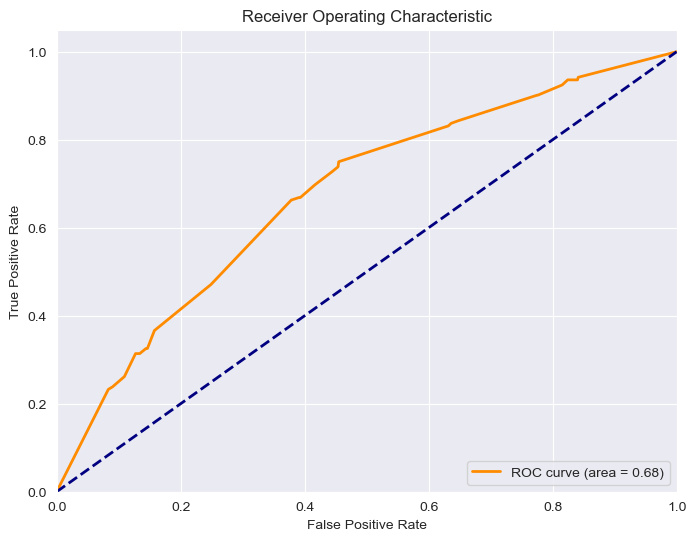

In [366]:
ada_st=AdaBoostClassifier(n_estimators=1000,learning_rate=.001,random_state=42)
train_classifier(ada_st,x_train_st_pca,y_smote_tomek,x_test_st_pca,y_test)

After applying **adaBoost** to the smote_tomek resampled data after dimensionality reduction , the accuracy results are as follows:
- **Training_pca Accuracy**: 65.9%
- **Testing_pca Accuracy**: 62%
- **Training recall**: 70.4%
- **Testing recall**: 67.4%

Accuracy for train is : 0.8615916955017301 %   Accuracy for test is : 0.8386792452830188 % 
recall for train is : 0.06794055201698514 %   recall for test is : 0.029069767441860465 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2708
           1       0.97      0.07      0.13       471

    accuracy                           0.86      3179
   macro avg       0.92      0.53      0.53      3179
weighted avg       0.88      0.86      0.81      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       888
           1       0.56      0.03      0.06       172

    accuracy                           0.84      1060
   macro avg       0.70      0.51      0.48      1060
weighted avg       0.79      0.84      0.77      1060


Confusion Matrix for train :
[[2707    1]
 [ 439   32]]

Confusion Matrix for test :
[[884   

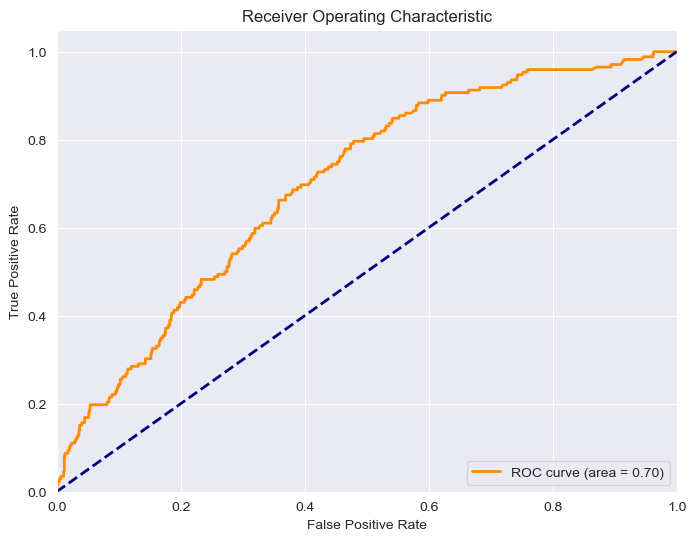

In [367]:
gra_b=GradientBoostingClassifier(n_estimators=2000,max_depth=3,learning_rate=.001,min_samples_split=3,min_samples_leaf=2)
train_classifier(gra_b,x_train_pca,y_train,x_test_pca,y_test)

Accuracy for train is : 0.7990723562152133 %   Accuracy for test is : 0.6556603773584906 % 
recall for train is : 0.8319109461966605 %   recall for test is : 0.5058139534883721 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      2695
           1       0.78      0.83      0.81      2695

    accuracy                           0.80      5390
   macro avg       0.80      0.80      0.80      5390
weighted avg       0.80      0.80      0.80      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       888
           1       0.24      0.51      0.32       172

    accuracy                           0.66      1060
   macro avg       0.56      0.60      0.55      1060
weighted avg       0.77      0.66      0.70      1060


Confusion Matrix for train :
[[2065  630]
 [ 453 2242]]

Confusion Matrix for test :
[[608 280]


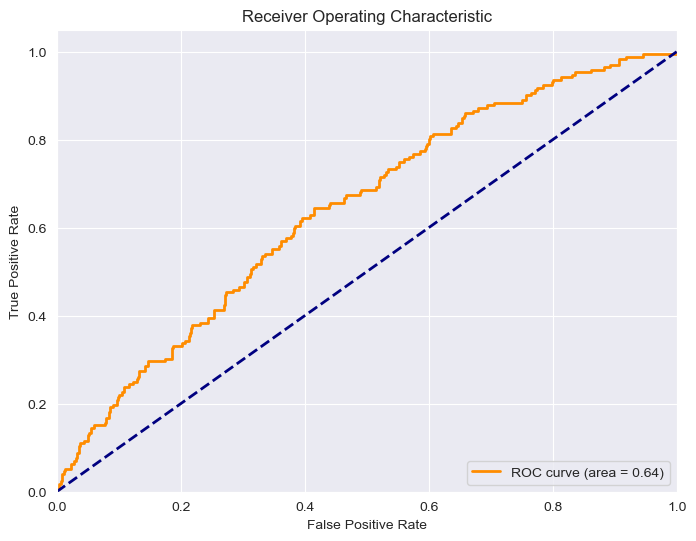

In [368]:
gra_b=GradientBoostingClassifier(n_estimators=2000,max_depth=3,learning_rate=.01,min_samples_split=4,min_samples_leaf=4,random_state=42)
train_classifier(gra_b,x_train_st_pca,y_smote_tomek,x_test_st_pca,y_test)

After applying **GradiantBoost** to the smote_tomek resampled data after dimensionality reduction , the accuracy results are as follows:
- **Training_pca Accuracy**: 8%
- **Testing_pca Accuracy**: 66%
- **Training recall**: 83.8%
- **Testing recall**: 52.3%

Accuracy for train is : 0.8996539792387543 %   Accuracy for test is : 0.8245283018867925 % 
recall for train is : 0.3354564755838641 %   recall for test is : 0.040697674418604654 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      2708
           1       0.96      0.34      0.50       471

    accuracy                           0.90      3179
   macro avg       0.93      0.67      0.72      3179
weighted avg       0.91      0.90      0.88      3179


Classification Report for test :
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       888
           1       0.25      0.04      0.07       172

    accuracy                           0.82      1060
   macro avg       0.55      0.51      0.49      1060
weighted avg       0.74      0.82      0.77      1060


Confusion Matrix for train :
[[2702    6]
 [ 313  158]]

Confusion Matrix for test :
[[867  21

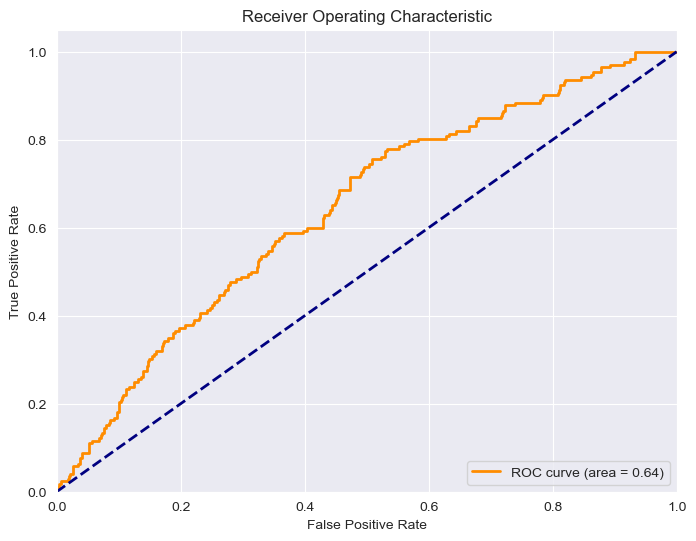

In [369]:
xgmodel = XGBClassifier(
    max_depth=3,
    learning_rate=0.01,
    n_estimators=3000,
    random_state=42,
    
    )
train_classifier(xgmodel,x_train_pca,y_train,x_test_pca,y_test)

Accuracy for train is : 0.6732838589981447 %   Accuracy for test is : 0.5716981132075472 % 
recall for train is : 0.7974025974025974 %   recall for test is : 0.7558139534883721 % 

Classification Report for train :
              precision    recall  f1-score   support

           0       0.73      0.55      0.63      2695
           1       0.64      0.80      0.71      2695

    accuracy                           0.67      5390
   macro avg       0.68      0.67      0.67      5390
weighted avg       0.68      0.67      0.67      5390


Classification Report for test :
              precision    recall  f1-score   support

           0       0.92      0.54      0.68       888
           1       0.24      0.76      0.36       172

    accuracy                           0.57      1060
   macro avg       0.58      0.65      0.52      1060
weighted avg       0.81      0.57      0.63      1060


Confusion Matrix for train :
[[1480 1215]
 [ 546 2149]]

Confusion Matrix for test :
[[476 412]


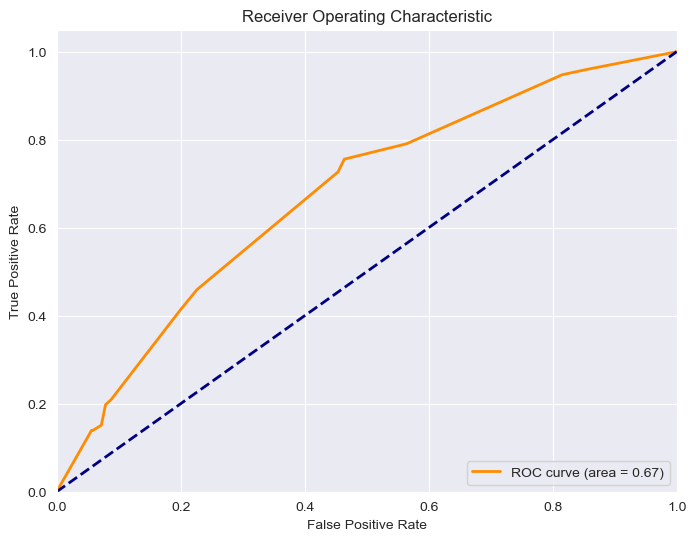

In [370]:
best_xgmodel = XGBClassifier(
    max_depth=3,
    learning_rate=.00001,
    n_estimators=3500,
    random_state=42,
    
    )
train_classifier(best_xgmodel,x_train_st_pca,y_smote_tomek,x_test_st_pca,y_test)

After applying **XGBoost** to the smote_tomek resampled data after dimensionality reduction , the accuracy results are as follows:
- **Training_pca Accuracy**: 67%
- **Testing_pca Accuracy**: 56.8%
- **Training recall**: 80.5%
- **Testing recall**: 76.7%

----

----

# Models Performance with out PCA 

| Model              | Training Accuracy | Testing Accuracy | Training Recall | Testing Recall |
|--------------------|-------------------|------------------|-----------------|----------------|
| Logistic Regression| 67.8%             | 65.3%            | 67.9%           | 61.6%          |
| SVC                | 74.4%             | 53.8%            | 92.3%           | 82.6%          |
| Random Forest      | 73.8%             | 67.1%            | 77.8%           | 60.5%          |
| AdaBoost           | 68.0%             | 60.8%            | 77.4%           | 71.5%          |
| GradientBoost      | 67.9%             | 62.0%            | 76.2%           | 69.8%          |
| XGBoost            | 68.5%             | 61.7%            | 77.8%           | 70.3%          |

### Confusion Matrices

| Model               | True Negatives | False Positives | False Negatives | True Positives |
|----------------------|----------------|-----------------|-----------------|----------------|
| Logistic Regression | 586            | 302             | 66              | 106            |
| SVC                 | 428            | 460             | 30              | 142            |
| Random Forest       | 607            | 281             | 68              | 104            |
| AdaBoost            | 521            | 367             | 49              | 123            |
| Gradient Boost      | 538            | 350             | 52              | 120            |
| XGBoost             | 533            | 355             | 51              | 121            |

----

### Model Performance with PCA

| Model            | Training PCA Accuracy | Testing PCA Accuracy | Training Recall | Testing Recall |
|-------------------|-----------------------|-----------------------|-----------------|----------------|
| Logistic Regression | 67.5%                | 66.8%                | 68.2%          | 64%           |
| SVC               | 82.8%                | 65.8%                | 89.6%          | 50.6%         |
| Random Forest     | 71.6%                | 64.2%                | 76.2%          | 64%           |
| AdaBoost          | 65.9%                | 62%                  | 70.4%          | 67.4%         |
| Gradient Boost    | 8%                   | 66%                  | 83.8%          | 52.3%         |
| XGBoost           | 67%                  | 56.8%                | 80.5%          | 76.7%         |

### Confusion Matrices with PCA

| Model               | True Negatives | False Positives | False Negatives | True Positives |
|----------------------|----------------|-----------------|-----------------|----------------|
| Logistic Regression | 598            | 290             | 62              | 110            |
| SVC                 | 610            | 278             | 85              | 87             |
| Random Forest       | 571            | 317             | 62              | 110            |
| AdaBoost            | 541            | 347             | 56              | 116            |
| Gradient Boost      | 613            | 275             | 82              | 90             |
| XGBoost             | 470            | 418             | 40              | 132            |

---



In a heart disease detection problem, recall (also called sensitivity or true positive rate) is typically the most important metric. This is because it measures the model's ability to correctly identify patients with heart disease (true positives), which is critical in medical applications where missing a diagnosis can have serious consequences.
### Best Model Selection
Without PCA: **SVC** has the highest recall (82.6%), making it the best choice without dimensionality reduction. However, it has high false positives, which could lead to unnecessary follow-ups or treatments.

With PCA: ***XGBoost*** has the highest recall (76.7%), making it the best model with dimensionality reduction. It balances recall and false positives better than SVC.
### Implementation Plan

To allow users to try both models, we will:  
1. **Deploy the Models in Streamlit**:  
   - Create a user interface where individuals can select between the two models.  
2. **Interactive Comparison**:  
   - Users can input data and see predictions from both models.  
This approach ensures flexibility and empowers users to choose the model based on their priorities.

### Saving the Models in a Dictionary for Serialization

To prepare for deployment, we save the trained models in a dictionary and serialize them into a `.pkl` file for later use.


In [371]:
models={"SVC":best_svc,"XGBoost":best_xgmodel}

### final Saving Encoders, Scalers, Columns, Models, and PCA Objects to Pickle

To ensure reusability during deployment, save the following objects into a `.pkl` file:

1. **Encoders**:  
   Used to transform categorical columns.

2. **Scaler**:  
   Used to standardize continuous columns.

3. **Columns**:  
   The list of features used in the models.

4. **Models**:  
   The trained models (Logistic Regression, SVC with PCA).

5. **PCA**:  
   The PCA object for transforming the data.


In [372]:
models

{'SVC': SVC(C=0.06, gamma=1, probability=True),
 'XGBoost': XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=1e-05, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=3500,
               n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
               reg_alpha=0, reg_lambda=1, ...)}

In [374]:
with open("encoders.pkl","wb") as f :
    pickle.dump(encoders,f)
with open("scaller.pkl","wb") as f :
    pickle.dump(scaller,f)
with open("fetures.pkl","wb") as f :
    pickle.dump(X.columns,f)
with open("PCA.pkl","wb") as f :
    pickle.dump(pca2,f)
with open("models.pkl","wb") as f :
    pickle.dump(models,f)



Thank you for taking the time to review my project notebook.  
I hope you found it informative and valuable!
### 😊  Stay happy and healthy! 😊
